In [95]:
#Creamos un dataset que NO untiliza los arrivos anteriores
# solo utiliza las salidas

import pandas as pd
import numpy as np
import sys
import os

# Agregar el directorio raíz del proyecto al path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from src_main.features_1.graficos import graficar_pred_vs_real
from src_main.graficos_global import graficar_pca
from graficos_stats import analizar_metricas_por_estacion, graficar_metricas_vs_salidas, mostrar_estaciones_extremas


In [96]:
# Importo el dataset de features 3 train
ds_train_3 = pd.read_csv('../../data/processed/features3/train_dataset_features_3.csv')

#Ahora evaluo en el set de validacion
ds_val_3 = pd.read_csv('../../data/processed/features3/val_dataset_features_3.csv')


In [97]:
#Pre procesamiento para los datasets
#Elimino las ultimas 38 columnas
ds_train_3 = ds_train_3.iloc[:, :-38]

#Hago one hot encoding a la columna mes
ds_train_3 = pd.get_dummies(ds_train_3, columns=['mes'], prefix='mes', drop_first=True)

In [98]:


#Elimino las columnas que empiezan con pct
ds_train_3 = ds_train_3.loc[:, ~ds_train_3.columns.str.startswith('pct')]

def generar_y_val(ds_val_3):


    # Obtener todas las columnas que son targets
    target_columns = [col for col in ds_val_3.columns if col.startswith('target_estacion_')]
    print(f"📊 Encontradas {len(target_columns)} estaciones como targets")
    print(f"Primeros 5 targets: {target_columns[:5]}")

    # Extraer los IDs de las estaciones de los nombres de columnas
    estaciones_ids = [int(col.replace('target_estacion_', '')) for col in target_columns]
    estaciones_ids_sorted = sorted(estaciones_ids)
    print(f"🏪 IDs de estaciones ordenados: {estaciones_ids_sorted[:10]}...")

    # Reordenar las columnas de targets por ID de estación
    target_columns_sorted = [f'target_estacion_{est_id}' for est_id in estaciones_ids_sorted]

    # Generar variable y como lista de listas
    # Cada sublista contiene los targets de todas las estaciones para una muestra
    y_val = ds_val_3[target_columns_sorted].values.tolist()

    print(f"✅ Variable y generada:")
    print(f"   • Tipo: {type(y_val)}")
    print(f"   • Dimensiones: {len(y_val)} muestras × {len(y_val[0])} estaciones")
    print(f"   • Ejemplo muestra 0: {y_val[0][:5]}...")  # Primeros 5 targets de la primera muestra
    print(f"   • Ejemplo muestra 1: {y_val[1][:5]}...")  # Primeros 5 targets de la segunda muestra

    # Verificar que no hay valores NaN
    y_val_array = np.array(y_val)
    nan_count = np.isnan(y_val_array).sum()
    print(f"📈 Estadísticas:")
    print(f"   • Valores NaN: {nan_count}")
    print(f"   • Min target: {y_val_array.min():.2f}")
    print(f"   • Max target: {y_val_array.max():.2f}")
    print(f"   • Media target: {y_val_array.mean():.2f}")

    # Opcional: También puedes generar X (features) excluyendo los targets
    feature_columns = [col for col in ds_val_3.columns if not col.startswith('target_estacion_')]
    X_val = ds_val_3[feature_columns]
    print(f"\n🎯 Features (X):")
    print(f"   • Dimensiones: {X_val.shape}")
    print(f"   • Columnas: {list(X_val.columns)[:5]}...")

    return y_val, X_val, target_columns_sorted

y_train, X_train, target_columns_sorted = generar_y_val(ds_train_3)



📊 Encontradas 324 estaciones como targets
Primeros 5 targets: ['target_estacion_2', 'target_estacion_3', 'target_estacion_4', 'target_estacion_5', 'target_estacion_6']
🏪 IDs de estaciones ordenados: [2, 3, 4, 5, 6, 7, 8, 9, 12, 13]...
✅ Variable y generada:
   • Tipo: <class 'list'>
   • Dimensiones: 11797 muestras × 324 estaciones
   • Ejemplo muestra 0: [1.0, 0.0, 0.0, 2.0, 0.0]...
   • Ejemplo muestra 1: [0.0, 0.0, 0.0, 3.0, 0.0]...
📈 Estadísticas:
   • Valores NaN: 0
   • Min target: 0.00
   • Max target: 39.00
   • Media target: 0.96

🎯 Features (X):
   • Dimensiones: (11797, 382)
   • Columnas: ['fecha_hora', 'hora', 'dia_semana', 'año', 'es_feriado']...


In [99]:



# Generar y_val y X_val
y_val, X_val, target_columns_sorted_val = generar_y_val(ds_val_3)


📊 Encontradas 354 estaciones como targets
Primeros 5 targets: ['target_estacion_2', 'target_estacion_3', 'target_estacion_4', 'target_estacion_5', 'target_estacion_6']
🏪 IDs de estaciones ordenados: [2, 3, 4, 5, 6, 7, 8, 9, 12, 13]...
✅ Variable y generada:
   • Tipo: <class 'list'>
   • Dimensiones: 1351 muestras × 354 estaciones
   • Ejemplo muestra 0: [0.0, 0.0, 0.0, 0.0, 0.0]...
   • Ejemplo muestra 1: [0.0, 0.0, 0.0, 0.0, 0.0]...
📈 Estadísticas:
   • Valores NaN: 0
   • Min target: 0.00
   • Max target: 36.00
   • Media target: 1.00

🎯 Features (X):
   • Dimensiones: (1351, 368)
   • Columnas: ['fecha_hora', 'hora', 'dia_semana', 'mes', 'año']...


In [100]:
from procesing import equiparar_columnas
#Encuentro x e y para val y test
(y_train_array_fixed, X_train_clean_fixed, 
 y_val_array_fixed, X_val_clean_fixed, target_columns_sorted_val) = equiparar_columnas(ds_train_3, ds_val_3)




🔄 Sincronizando columnas entre train y val...
📊 Features - Train: 382, Val: 368
🎯 Targets - Train: 324, Val: 354
❌ Features solo en train (serán eliminadas): 19
❌ Targets solo en train (serán eliminadas): 7
❌ Features faltantes en val: 19
❌ Targets faltantes en val: 7
   Primeras 5 features a eliminar de train: ['mes_6', 'mes_3', 'mes_8', 'bicis_salieron_estacion_205', 'mes_4']
   Primeras 5 targets a eliminar de train: ['target_estacion_459', 'target_estacion_151', 'target_estacion_169', 'target_estacion_205', 'target_estacion_95']
   ✅ Eliminada de train: mes_6
   ✅ Eliminada de train: mes_5
   ✅ Eliminada de train: mes_3
   ✅ Eliminada de train: bicis_salieron_estacion_169
   ✅ Eliminada de train: mes_7
   ✅ Eliminada de train: mes_8
   ✅ Eliminada de train: mes_12
   ✅ Eliminada de train: target_estacion_151
   ✅ Eliminada de train: target_estacion_169
   ✅ Eliminada de train: bicis_salieron_estacion_205
   ✅ Eliminada de train: mes_4
   ✅ Eliminada de train: bicis_salieron_estacio

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def normalizar_features(X, exclude_binary=True, exclude_targets=True, target_prefix='target_estacion_'):
    """
    Normaliza los features del dataset excluyendo columnas binarias y columnas target.
    
    Parameters:
    -----------
    X : pandas.DataFrame
        DataFrame que contiene los features a normalizar
    exclude_binary : bool, default=True
        Si es True, excluye las columnas binarias (solo 0s y 1s) de la normalización
    exclude_targets : bool, default=True
        Si es True, excluye las columnas que comienzan con 'target_estacion_'
    target_prefix : str, default='target_estacion_'
        Prefijo para identificar las columnas target
    
    Returns:
    --------
    X_norm : pandas.DataFrame
        DataFrame con las columnas numéricas normalizadas
    """
    
    print(f"🔄 Normalizando features...")
    print(f"   • Dataset original: {X.shape[0]} muestras, {X.shape[1]} columnas")
    
    # Crear una copia para no modificar el original
    X_norm = X.copy()
    
    # Identificar columnas a excluir
    columns_to_exclude = []
    
    # Excluir columnas target
    if exclude_targets:
        target_columns = [col for col in X.columns if col.startswith(target_prefix)]
        columns_to_exclude.extend(target_columns)
        print(f"   • Excluyendo {len(target_columns)} columnas target")
    
    # Excluir columnas binarias
    binary_columns = []
    if exclude_binary:
        for col in X.columns:
            # Verificar si la columna no está ya excluida y es binaria
            if col not in columns_to_exclude:
                unique_vals = X[col].dropna().unique()
                if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1}):
                    binary_columns.append(col)
        
        columns_to_exclude.extend(binary_columns)
        print(f"   • Excluyendo {len(binary_columns)} columnas binarias")
    
    # Identificar columnas a normalizar
    columns_to_normalize = [col for col in X.columns if col not in columns_to_exclude]
    print(f"   • Normalizando {len(columns_to_normalize)} columnas")
    
    if len(columns_to_normalize) > 0:
        # Aplicar normalización
        scaler = StandardScaler()
        X_norm[columns_to_normalize] = scaler.fit_transform(X_norm[columns_to_normalize])
        
        # Estadísticas después de normalizar
        normalized_mean = X_norm[columns_to_normalize].mean().mean()
        normalized_std = X_norm[columns_to_normalize].std().mean()
        print(f"   • Media después de normalizar: {normalized_mean:.4f}")
        print(f"   • Desviación estándar después de normalizar: {normalized_std:.4f}")
    else:
        print("   ⚠️ No hay columnas para normalizar")
    
    # Verificar NaNs
    nan_count = X_norm.isna().sum().sum()
    if nan_count > 0:
        print(f"   ⚠️ Se encontraron {nan_count} valores NaN después de la normalización")
        # Reemplazar NaNs con 0
        X_norm.fillna(0, inplace=True)
        print(f"   ✅ NaNs reemplazados con 0")
    
    print(f"✅ Normalización completada")
    return X_norm


# Normalizar los features de entrenamiento y validación
X_train_clean_fixed = normalizar_features(X_train_clean_fixed)
X_val_clean_fixed = normalizar_features(X_val_clean_fixed)

🔄 Normalizando features...
   • Dataset original: 11797 muestras, 362 columnas
   • Excluyendo 0 columnas target
   • Excluyendo 1 columnas binarias
   • Normalizando 361 columnas
   • Media después de normalizar: 0.0000
   • Desviación estándar después de normalizar: 1.0000
✅ Normalización completada
🔄 Normalizando features...
   • Dataset original: 1351 muestras, 362 columnas
   • Excluyendo 0 columnas target
   • Excluyendo 1 columnas binarias
   • Normalizando 361 columnas
   • Media después de normalizar: -0.0000
   • Desviación estándar después de normalizar: 0.9976
✅ Normalización completada


In [102]:
#Ahora entrenamos una regresion lineal
from sklearn.linear_model import LinearRegression
# Entrenar un modelo de regresión lineal
model = LinearRegression()
#Sacar de X la columna fecha_hora
#X_train = X_train_clean_fixed.drop(columns=['fecha_hora'])
model.fit(X_train_clean_fixed, y_train_array_fixed)

#Imprimo los pesos de cada feature
# Obtener los coeficientes para la primera estación
coefs_first_station = model.coef_[0]

feature_weights = [(feature, weight) for feature, weight in zip(X_train_clean_fixed.columns, coefs_first_station)]

# Ordenar por valor absoluto para ver los más importantes primero
feature_weights.sort(key=lambda x: abs(x[1]), reverse=True)

# Mostrar también el promedio de importancia de cada feature en todas las estaciones
print("\nImportancia media de features en todas las estaciones:")
avg_importance = np.abs(model.coef_).mean(axis=0)
feature_importance = list(zip(X_train_clean_fixed.columns, avg_importance))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Mostrar top 20 features promedio
print("Top 20 features más importantes en promedio:")
for feature, importance in feature_importance[:20]:
    print(f"{feature}: {importance:.4f}")

#Suma todos los pesos de las features que empiezan con "bicis_salieron_estacion_"
bicis_salieron_weights = [weight for feature, weight in feature_weights if feature.startswith('bicis_salieron_estacion_')]
total_bicis_salieron_weight = sum(bicis_salieron_weights)

print(f"\nTotal peso de 'bicis_salieron_estacion_*': {total_bicis_salieron_weight:.4f}")


Importancia media de features en todas las estaciones:
Top 20 features más importantes en promedio:
total_bicis_salieron_global: 1.6634
bicis_salieron_estacion_175: 0.0858
es_feriado: 0.0652
bicis_salieron_estacion_130: 0.0536
bicis_salieron_estacion_448: 0.0451
bicis_salieron_estacion_150: 0.0451
bicis_salieron_estacion_26: 0.0381
bicis_salieron_estacion_444: 0.0370
bicis_salieron_estacion_131: 0.0345
bicis_salieron_estacion_516: 0.0343
hora: 0.0338
bicis_salieron_estacion_60: 0.0326
q3_edad_salieron_global: 0.0324
bicis_salieron_estacion_515: 0.0320
bicis_salieron_estacion_379: 0.0316
bicis_salieron_estacion_435: 0.0315
bicis_salieron_estacion_3: 0.0311
bicis_salieron_estacion_4: 0.0311
bicis_salieron_estacion_353: 0.0305
media_edad_salieron_global: 0.0304

Total peso de 'bicis_salieron_estacion_*': 9.9921


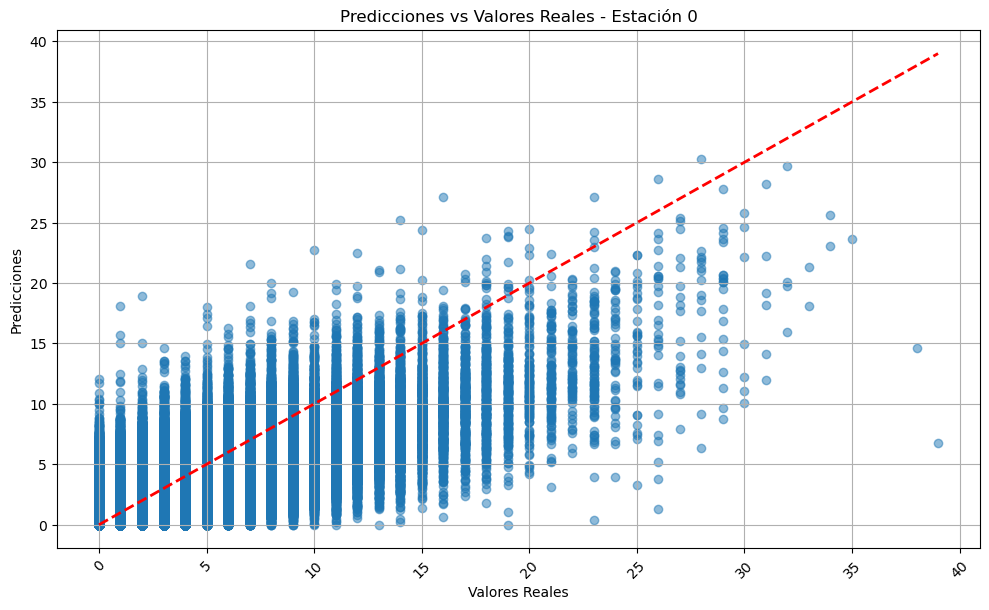

La media de los valores reales es: 0.9661013640584986
La media de las predicciones es: 0.9733762990888642


In [103]:
#Veo como le va al predecir en train
predicciones_train = model.predict(X_train_clean_fixed)
#Clipeo las predicciones para que siempre sean mayores a cero
predicciones_train = np.clip(predicciones_train, 0, None)
graficar_pred_vs_real(y_train_array_fixed, predicciones_train, 0)

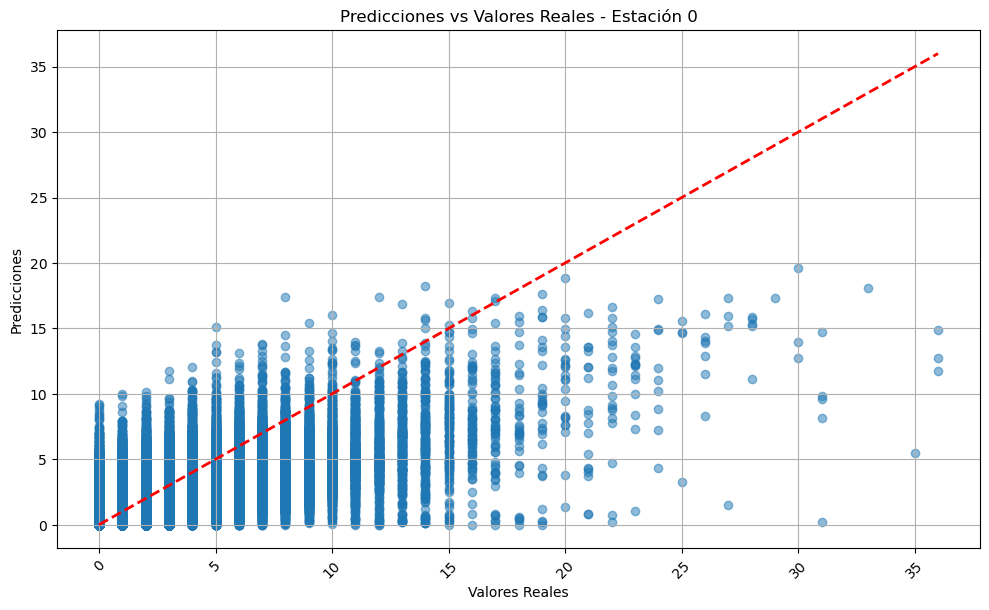

La media de los valores reales es: 1.0303385504836935
La media de las predicciones es: 0.9762137863296534


In [104]:

#Genero las predicciones sobre el dataset de train
predictions = model.predict(X_val_clean_fixed)
# Convertir las predicciones a un DataFrame para facilitar la visualización
predictions_df = pd.DataFrame(predictions, columns=target_columns_sorted_val)

#Clipeo las predicciones para que sean como minimo cero
predictions_df = predictions_df.clip(lower=0)

graficar_pred_vs_real(y_val_array_fixed, predictions_df.values, 0)
import matplotlib.pyplot as plt
# Función para graficar una estación específica
def graficar_estacion_individual(y_val_array, y_pred_array, estacion_idx, estacion_nombre):
    """
    Grafica una estación específica del array multitarget
    """
    y_val_estacion = y_val_array[:, estacion_idx]
    y_pred_estacion = y_pred_array[:, estacion_idx]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val_estacion, y_pred_estacion, alpha=0.6)
    plt.plot([y_val_estacion.min(), y_val_estacion.max()], 
             [y_val_estacion.min(), y_val_estacion.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Reales - Estación {estacion_nombre}')
    plt.grid(True)
    plt.show()
    
    print(f"📊 Estación {estacion_nombre}:")
    print(f"   • Media real: {y_val_estacion.mean():.3f}")
    print(f"   • Media predicha: {y_pred_estacion.mean():.3f}")
    print(f"   • MAE: {np.abs(y_val_estacion - y_pred_estacion).mean():.3f}")

# # Graficar las primeras 3 estaciones como ejemplo
# for i in range(min(6, len(target_columns_sorted_val))):
#     estacion_id = target_columns_sorted_val[i].replace('target_estacion_', '')
#     graficar_estacion_individual(y_val_array_fixed, predictions_df.values, i, estacion_id)

In [ ]:
# ds_test_3 = pd.read_csv('../../data/processed/features3/test_dataset_features_3.csv')
# #Encuentro x e y para val y test
# (y_train_array_fixed, X_train_clean_fixed, 
#  y_test_array_fixed, X_test_clean_fixed, target_columns_sorted_test) = equiparar_columnas(ds_train_3, ds_test_3)



# #testeo en test
# predictions_test = model.predict(X_test_clean_fixed)
# # Convertir las predicciones a un DataFrame para facilitar la visualización
# predictions_test_df = pd.DataFrame(predictions_test, columns=target_columns_sorted_test)
# graficar_pred_vs_real(y_test_array_fixed, predictions_test_df.values, 0)

🔄 Sincronizando columnas entre train y val...
📊 Features - Train: 382, Val: 377
🎯 Targets - Train: 324, Val: 363
❌ Features solo en train (serán eliminadas): 17
❌ Targets solo en train (serán eliminadas): 6
❌ Features faltantes en val: 17
❌ Targets faltantes en val: 6
   Primeras 5 features a eliminar de train: ['bicis_salieron_estacion_459', 'mes_5', 'mes_6', 'mes_7', 'mes_3']
   Primeras 5 targets a eliminar de train: ['target_estacion_459', 'target_estacion_151', 'target_estacion_205', 'target_estacion_95', 'target_estacion_31']
   ✅ Eliminada de train: mes_6
   ✅ Eliminada de train: mes_5
   ✅ Eliminada de train: mes_7
   ✅ Eliminada de train: mes_3
   ✅ Eliminada de train: mes_12
   ✅ Eliminada de train: mes_8
   ✅ Eliminada de train: target_estacion_151
   ✅ Eliminada de train: bicis_salieron_estacion_205
   ✅ Eliminada de train: mes_4
   ✅ Eliminada de train: bicis_salieron_estacion_95
   ✅ Eliminada de train: bicis_salieron_estacion_30
   ✅ Eliminada de train: bicis_salieron_es

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- bicis_salieron_estacion_169
- bicis_salieron_estacion_503


/var/folders/wl/ysq5_w495sjftqw5mf_0hkvh0000gn/T/ipykernel_6813/2863147336.py:3: DtypeWarning: Columns (1,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_para_salidas = pd.read_csv(df_unificado_path)


✅ Usando dataset unificado para contar salidas
📊 Calculando métricas por estación...
Estación 2: MAE=0.921, R²=0.421, Salidas=15333
Estación 3: MAE=1.130, R²=0.519, Salidas=25203
Estación 4: MAE=1.317, R²=0.556, Salidas=27006
Estación 5: MAE=1.694, R²=0.568, Salidas=45446
Estación 6: MAE=1.151, R²=0.447, Salidas=15821

📈 Estadísticas generales:
   • MAE promedio: 0.779
   • R² promedio: 0.305
   • Rango salidas: 334 - 62239


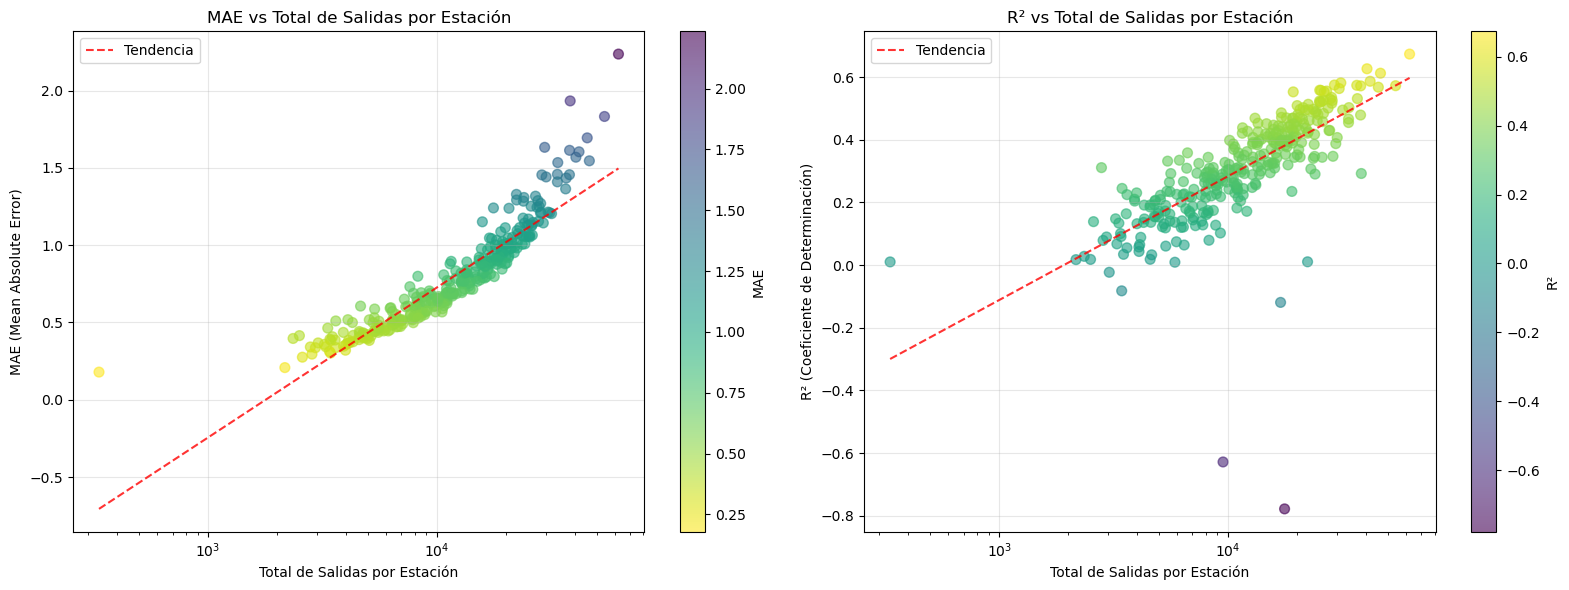


🔍 Análisis de correlación:
   • Correlación MAE vs log(Salidas): 0.915
   • Correlación R² vs log(Salidas): 0.723


In [107]:
df_unificado_path = os.path.join(project_root, 'data', 'clean', 'unificado_23_24.csv')
if os.path.exists(df_unificado_path):
    df_para_salidas = pd.read_csv(df_unificado_path)
    print("✅ Usando dataset unificado para contar salidas")
else:
    # Usar el dataset de train como aproximación
    df_para_salidas = ds_train_3
    print("⚠️ Usando dataset de train para contar salidas (aproximación)")

# Calcular métricas Regresion Lineal
metricas_df = analizar_metricas_por_estacion(
    y_val_array_fixed, 
    predictions_df.values, 
    target_columns_sorted_val,
    df_para_salidas
)

# Graficar
metricas_finales = graficar_metricas_vs_salidas(metricas_df)

building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.8s


building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


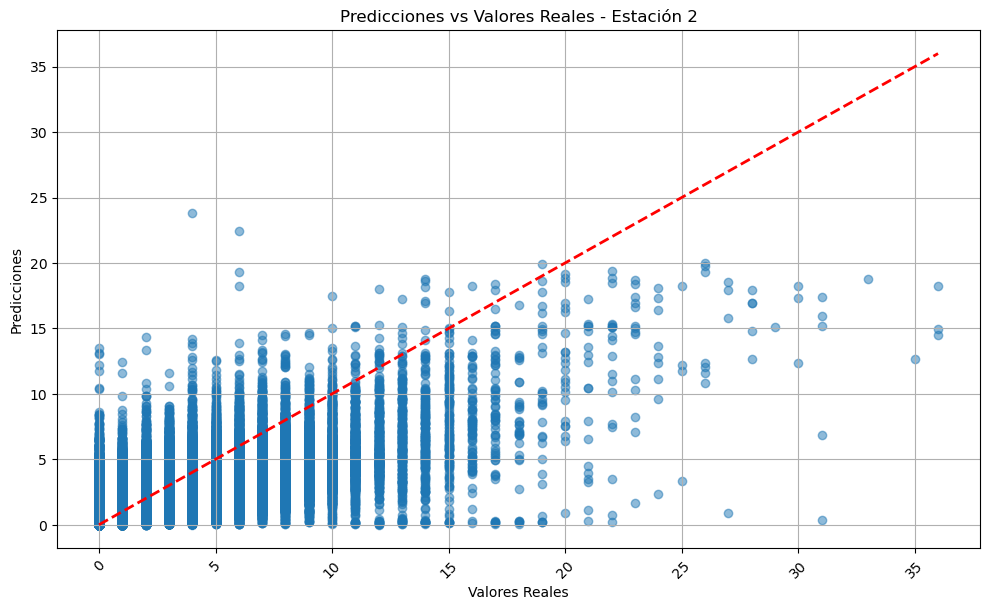

La media de los valores reales es: 1.0303385504836935
La media de las predicciones es: 0.9520390030194612


In [ ]:
#Hago lo mismo con XGboost
# Random Forest soporta multi-output nativamente (más eficiente)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
                                    n_estimators=200,
                                    max_depth=10,
                                    min_samples_split=10,
                                    min_samples_leaf=5,
                                    random_state=42, 
                                    verbose=2, 
                                    n_jobs=-1)
rf_model.fit(X_train_clean_fixed, y_train_array_fixed)

# Predicciones
rf_predictions = rf_model.predict(X_val_clean_fixed)
graficar_pred_vs_real(y_val_array_fixed, rf_predictions, 2)



building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.6s


building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


📊 Extra Trees:


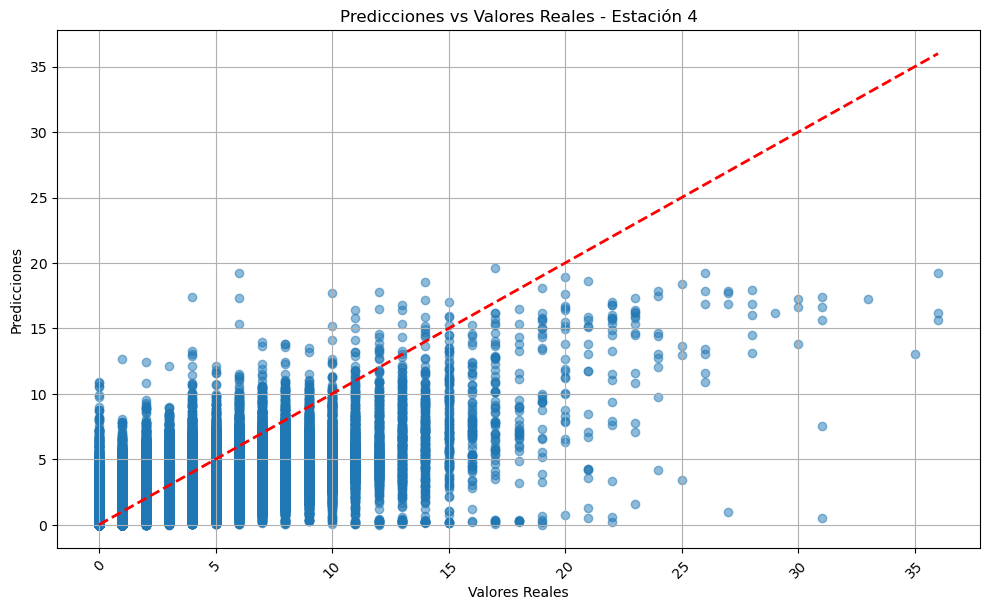

La media de los valores reales es: 1.0303385504836935
La media de las predicciones es: 0.9665087433773791


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# Extra Trees (más aleatorio que Random Forest)
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, verbose=2, n_jobs=-1)
et_model.fit(X_train_clean_fixed, y_train_array_fixed)
et_predictions = et_model.predict(X_val_clean_fixed)

print("📊 Extra Trees:")
graficar_pred_vs_real(y_val_array_fixed, et_predictions, 4)


Note: you may need to restart the kernel to use updated packages.
🚀 Entrenando XGBoost MultiOutput...
[18:56:12] INFO: /Users/runner/work/xgboost/xgboost/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (11797, 366, 4317702).
[18:56:13] INFO: /Users/runner/work/xgboost/xgboost/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (11797, 366, 4317702).
[18:56:14] INFO: /Users/runner/work/xgboost/xgboost/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (11797, 366, 4317702).
[18:56:15] INFO: /Users/runner/work/xgboost/xgboost/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (11797, 366, 4317702).
[18:56:16] INFO: /Users/runner/work/xgboost/xgboost/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (11797, 366, 4317702).
[18:56:17] INFO: /Users/runner/work/xgboost/xgboost/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeD

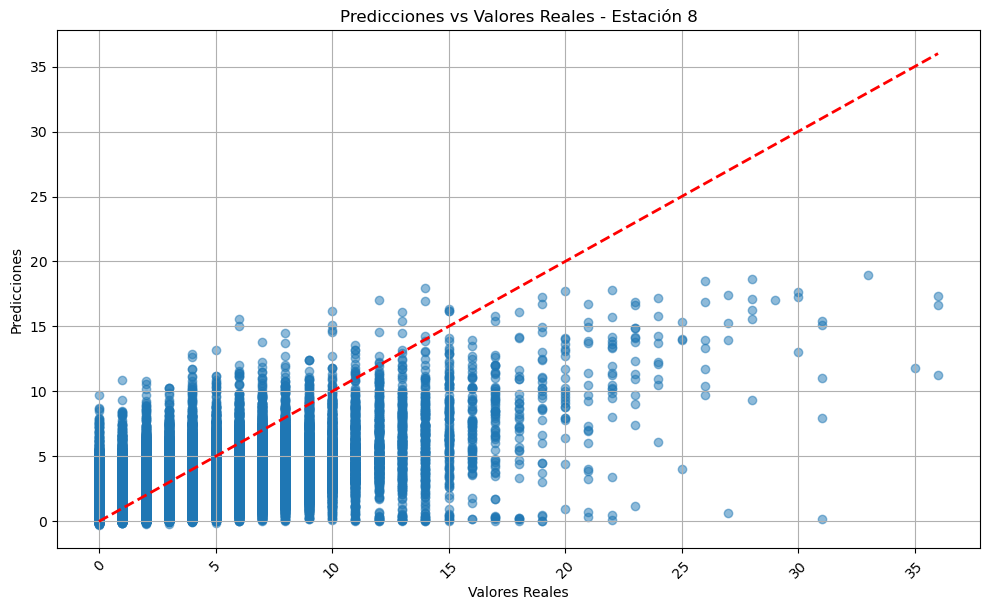

La media de los valores reales es: 1.0303385504836935
La media de las predicciones es: 0.8815451264381409

📊 Métricas XGBoost:
   MAE: 0.7442
   R²: 0.3159


In [ ]:
#Entreno un modelo con XGBoost
from sklearn.multioutput import MultiOutputRegressor
%pip install xgboost
from xgboost import XGBRegressor



xgb_model = MultiOutputRegressor(
    XGBRegressor(
        n_estimators=100,  # Aumenté el número de estimadores para ver mejor el progreso
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=1,  # Cambié a 1 para ver mejor el verbose (con -1 a veces no se muestra bien)
        verbosity=2,  # 0=silent, 1=warning, 2=info, 3=debug
        eval_metric='rmse'  # Métrica para mostrar durante entrenamiento
    )
)

print("🚀 Entrenando XGBoost MultiOutput...")
xgb_model.fit(X_train_clean_fixed, y_train_array_fixed)

# Predicciones
xgb_predictions = xgb_model.predict(X_val_clean_fixed)

print("📊 XGBoost MultiOutput:")
graficar_pred_vs_real(y_val_array_fixed, xgb_predictions, 8)

# Estadísticas
from sklearn.metrics import mean_absolute_error, r2_score
mae_xgb = mean_absolute_error(y_val_array_fixed, xgb_predictions)
r2_xgb = r2_score(y_val_array_fixed, xgb_predictions)

print(f"\n📊 Métricas XGBoost:")
print(f"   MAE: {mae_xgb:.4f}")
print(f"   R²: {r2_xgb:.4f}")

📊 Calculando métricas por estación...
Estación 2: MAE=0.864, R²=0.462, Salidas=15333
Estación 3: MAE=1.146, R²=0.499, Salidas=25203
Estación 4: MAE=1.312, R²=0.563, Salidas=27006
Estación 5: MAE=1.612, R²=0.594, Salidas=45446
Estación 6: MAE=1.090, R²=0.457, Salidas=15821

📈 Estadísticas generales:
   • MAE promedio: 0.744
   • R² promedio: 0.316
   • Rango salidas: 334 - 62239


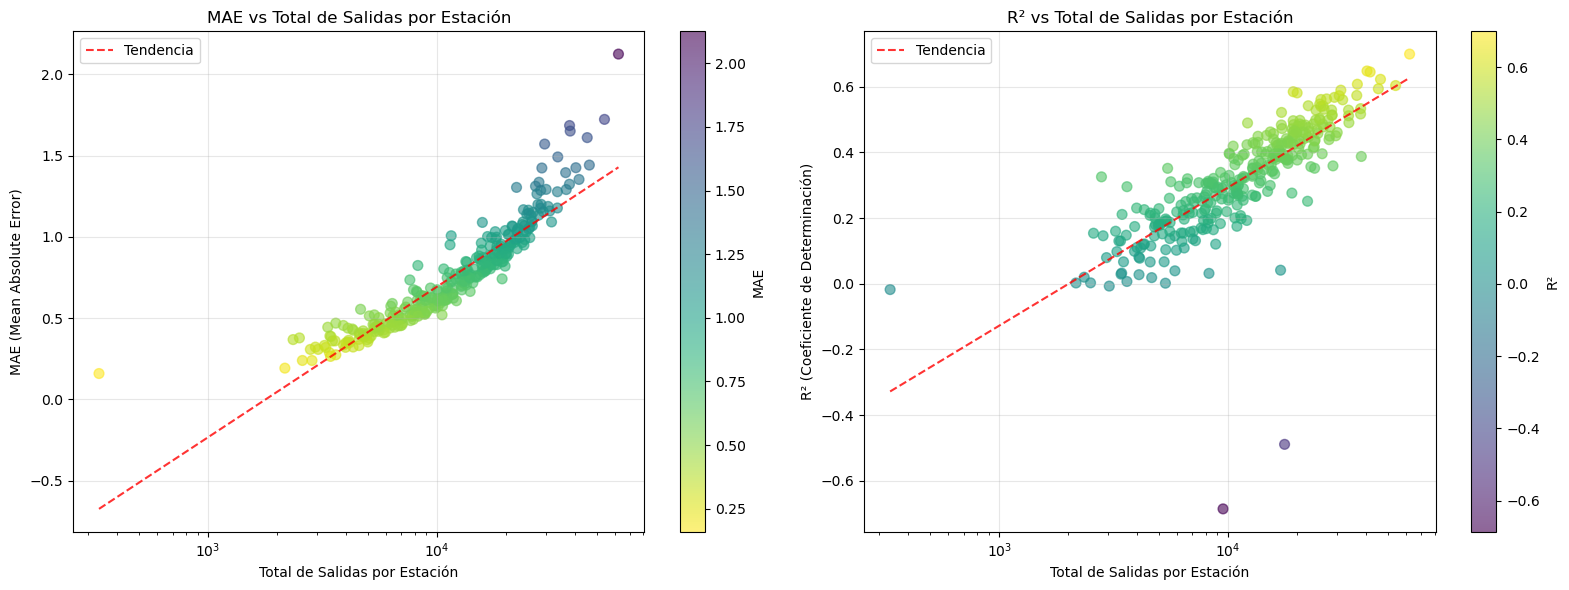


🔍 Análisis de correlación:
   • Correlación MAE vs log(Salidas): 0.921
   • Correlación R² vs log(Salidas): 0.782

🏆 TOP 5 ESTACIONES CON MENOR MAE:
   Estación 443: MAE=0.160, R²=-0.018, Salidas=334.0
   Estación 311: MAE=0.193, R²=0.002, Salidas=2,168.0
   Estación 482: MAE=0.240, R²=0.146, Salidas=2,848.0
   Estación 413: MAE=0.240, R²=0.154, Salidas=2,586.0
   Estación 471: MAE=0.265, R²=0.032, Salidas=3,434.0

🥇 TOP 5 ESTACIONES CON MAYOR R²:
   Estación 175: R²=0.699, MAE=2.126, Salidas=62,239.0
   Estación 130: R²=0.648, MAE=1.426, Salidas=40,542.0
   Estación 202: R²=0.645, MAE=1.354, Salidas=41,844.0
   Estación   8: R²=0.623, MAE=1.443, Salidas=46,434.0
   Estación  54: R²=0.608, MAE=1.292, Salidas=36,798.0

⚠️ TOP 5 ESTACIONES CON MAYOR MAE:
   Estación 175: MAE=2.126, R²=0.699, Salidas=62,239.0
   Estación  14: MAE=1.724, R²=0.604, Salidas=54,067.0
   Estación 131: MAE=1.686, R²=0.533, Salidas=38,049.0
   Estación 152: MAE=1.652, R²=0.388, Salidas=38,287.0
   Estación   5:

In [ ]:

# Ejecutar análisis con las predicciones de PyTorch
# Calcular métricas
metricas_df = analizar_metricas_por_estacion(
    y_val_array_fixed, 
    xgb_predictions, 
    target_columns_sorted_val,
    df_para_salidas
)

# Graficar
metricas_finales = graficar_metricas_vs_salidas(metricas_df)

# Mostrar estaciones extremas
mostrar_estaciones_extremas(metricas_df)

🧠 Entrenando Neural Network...


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, train_loss = 1.56197066, val_loss = 1.78126487


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, train_loss = 1.56263199, val_loss = 1.78943733


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, train_loss = 1.56469024, val_loss = 1.79642750


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, train_loss = 1.55942055, val_loss = 1.78821813


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, train_loss = 1.48223260, val_loss = 1.71484874


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, train_loss = 1.40052091, val_loss = 1.66241304


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, train_loss = 1.35853803, val_loss = 1.63847431


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, train_loss = 1.34346293, val_loss = 1.62777948


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, train_loss = 1.33352622, val_loss = 1.61922376


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, train_loss = 1.33308167, val_loss = 1.62141108


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, train_loss = 1.32524940, val_loss = 1.64056391


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, train_loss = 1.31220226, val_loss = 1.59255001


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, train_loss = 1.30200544, val_loss = 1.61058101


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, train_loss = 1.30253758, val_loss = 1.55949840


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, train_loss = 1.28630756, val_loss = 1.58461294


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, train_loss = 1.28846912, val_loss = 1.55509500


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, train_loss = 1.28247208, val_loss = 1.56163813


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, train_loss = 1.27692981, val_loss = 1.59141579


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, train_loss = 1.26977691, val_loss = 1.57875520


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, train_loss = 1.26969032, val_loss = 1.59517759


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, train_loss = 1.26888593, val_loss = 1.58098228


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, train_loss = 1.26508250, val_loss = 1.58065120


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, train_loss = 1.29116308, val_loss = 1.66953665


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, train_loss = 1.29086768, val_loss = 1.67345996


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, train_loss = 1.27994352, val_loss = 1.66879079


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, train_loss = 1.26604153, val_loss = 1.56978330


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, train_loss = 1.27570144, val_loss = 1.56093859


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, train_loss = 1.26925137, val_loss = 1.57151114


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, train_loss = 1.25404964, val_loss = 1.57873448


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, train_loss = 1.25128115, val_loss = 1.61032011


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, train_loss = 1.25101176, val_loss = 1.58995342


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, train_loss = 1.26672257, val_loss = 1.56833588


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, train_loss = 1.26787552, val_loss = 1.60791496


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, train_loss = 1.25986066, val_loss = 1.58825459


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, train_loss = 1.25994169, val_loss = 1.57284350


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, train_loss = 1.27085189, val_loss = 1.57851409


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, train_loss = 1.27648670, val_loss = 1.57093910


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, train_loss = 1.31465234, val_loss = 1.60663549


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, train_loss = 1.29757793, val_loss = 1.60516814


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, train_loss = 1.28870421, val_loss = 1.58812591
Iteration 41, train_loss = 1.27874352, val_loss = 1.58915668
Iteration 42, train_loss = 1.26726683, val_loss = 1.57385782
Iteration 43, train_loss = 1.25298888, val_loss = 1.58492560
Iteration 44, train_loss = 1.25444443, val_loss = 1.60320045
Iteration 45, train_loss = 1.25051759, val_loss = 1.60562127


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, train_loss = 1.24102866, val_loss = 1.58376804


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, train_loss = 1.23868772, val_loss = 1.57574550


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, train_loss = 1.24169417, val_loss = 1.59493054


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, train_loss = 1.23943852, val_loss = 1.61293037


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, train_loss = 1.24900963, val_loss = 1.63591458


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, train_loss = 1.26227004, val_loss = 1.65422291


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, train_loss = 1.26848462, val_loss = 1.65979495


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, train_loss = 1.26070384, val_loss = 1.63907998


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, train_loss = 1.25471298, val_loss = 1.61787994


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, train_loss = 1.24279291, val_loss = 1.59909203


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, train_loss = 1.22446902, val_loss = 1.57323124


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, train_loss = 1.22279074, val_loss = 1.58353554


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, train_loss = 1.22383563, val_loss = 1.57014063


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, train_loss = 1.22249112, val_loss = 1.57052765


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, train_loss = 1.22284198, val_loss = 1.56866842


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, train_loss = 1.21900183, val_loss = 1.57159751


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 62, train_loss = 1.21284609, val_loss = 1.58127143


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, train_loss = 1.21498163, val_loss = 1.59173373


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, train_loss = 1.21693889, val_loss = 1.59979960


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, train_loss = 1.22722528, val_loss = 1.63275886


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, train_loss = 1.23175182, val_loss = 1.63653990


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, train_loss = 1.24359616, val_loss = 1.63660357


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, train_loss = 1.24238735, val_loss = 1.63391640


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, train_loss = 1.24600976, val_loss = 1.63998605


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, train_loss = 1.23621251, val_loss = 1.64175985


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, train_loss = 1.24302879, val_loss = 1.64587941


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, train_loss = 1.24417798, val_loss = 1.63859606


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 73, train_loss = 1.24486050, val_loss = 1.64059736


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, train_loss = 1.23810765, val_loss = 1.63961010


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 75, train_loss = 1.22482463, val_loss = 1.63905698


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, train_loss = 1.21583766, val_loss = 1.63026536


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, train_loss = 1.21245289, val_loss = 1.62680505


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 78, train_loss = 1.21880328, val_loss = 1.62894186


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, train_loss = 1.21762009, val_loss = 1.63469680


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 80, train_loss = 1.21319685, val_loss = 1.64435631


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, train_loss = 1.22142999, val_loss = 1.66932206


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, train_loss = 1.23220155, val_loss = 1.66579714


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, train_loss = 1.22011733, val_loss = 1.65754520


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, train_loss = 1.21410892, val_loss = 1.65195322


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, train_loss = 1.20916913, val_loss = 1.62302153


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, train_loss = 1.20496758, val_loss = 1.61713964


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 87, train_loss = 1.19704497, val_loss = 1.62140144


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, train_loss = 1.18410460, val_loss = 1.62177249


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 89, train_loss = 1.18136175, val_loss = 1.63596781


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 90, train_loss = 1.17834065, val_loss = 1.63671966


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 91, train_loss = 1.18467468, val_loss = 1.66286502


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 92, train_loss = 1.17924093, val_loss = 1.64396190


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 93, train_loss = 1.17553478, val_loss = 1.63465803


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 94, train_loss = 1.16972972, val_loss = 1.63904645


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, train_loss = 1.17208262, val_loss = 1.63449344


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 96, train_loss = 1.16741051, val_loss = 1.63699873


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 97, train_loss = 1.16273460, val_loss = 1.62024456


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 98, train_loss = 1.16772388, val_loss = 1.61904468


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 99, train_loss = 1.17545072, val_loss = 1.62048522


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 100, train_loss = 1.18355566, val_loss = 1.62893339


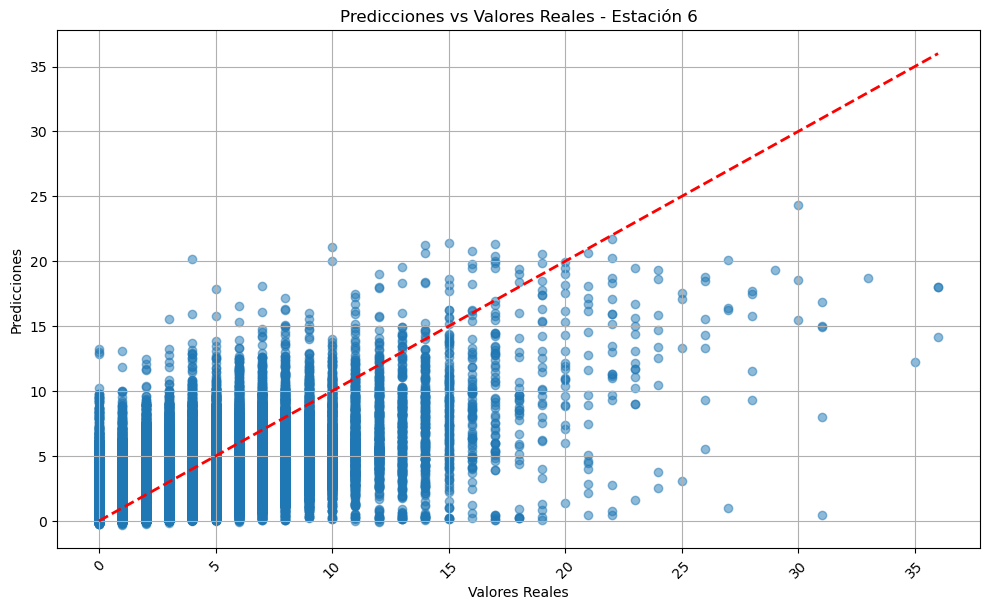

La media de los valores reales es: 1.0303385504836935
La media de las predicciones es: 1.0280297103376281


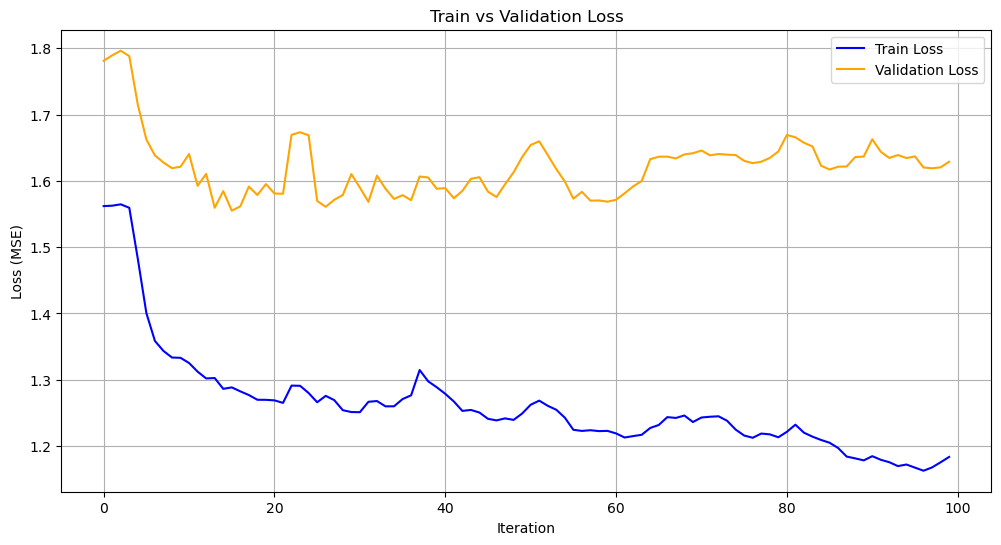

In [ ]:
# Neural Network simple con train y val loss
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Configurar modelo
nn_model = MLPRegressor(
    hidden_layer_sizes=(600, 500, 500, 500, 400, 390, 380, 370),
    max_iter=1,  # Una iteración a la vez
    warm_start=True,  # Continuar entrenamiento
    random_state=42,
    verbose=False  # Sin verbose de sklearn
)

print("🧠 Entrenando Neural Network...")

tran_losses = []
val_losses = []

# Entrenar iteración por iteración
for i in range(100):  # 100 iteraciones
    # Una iteración de entrenamiento
    nn_model.fit(X_train_clean_fixed, y_train_array_fixed)
    
    # Calcular losses
    train_pred = nn_model.predict(X_train_clean_fixed)
    val_pred = nn_model.predict(X_val_clean_fixed)
    
    train_loss = mean_squared_error(y_train_array_fixed, train_pred)
    val_loss = mean_squared_error(y_val_array_fixed, val_pred)

    tran_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Imprimir solo esto
    print(f"Iteration {i+1}, train_loss = {train_loss:.8f}, val_loss = {val_loss:.8f}")

# Predicciones finales
predictions_nn = nn_model.predict(X_val_clean_fixed)
graficar_pred_vs_real(y_val_array_fixed, predictions_nn, 6)

# Graficar las pérdidas de entrenamiento y validación
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(tran_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Hago una red neuronal con pytorch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate=0.5):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(500, 400)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(400, 390)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(390, 380)
        self.dropout4 = nn.Dropout(dropout_rate)
        self.fc5 = nn.Linear(380, output_size)
        self.loss_fn = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = nn.ReLU()(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = nn.ReLU()(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

    def train_model(self, x, y):
        self.optimizer.zero_grad()
        outputs = self.forward(x)
        loss = self.loss_fn(outputs, y)
        loss.backward()
        self.optimizer.step()
        return loss.item()
    



🔧 Preparando datos para PyTorch...
📊 Shapes:
   X_train: torch.Size([11797, 366])
   y_train: torch.Size([11797, 317])
   X_val: torch.Size([1351, 366])
   y_val: torch.Size([1351, 317])
🖥️ Usando dispositivo: cpu
🧠 Modelo creado:
   Input size: 366
   Output size: 317
   Parámetros: 809,647

🚀 Iniciando entrenamiento...
Epoch [10/200] - Train Loss: 1.350459, Val Loss: 1.581382, LR: 0.001000
Epoch [20/200] - Train Loss: 1.308784, Val Loss: 1.532156, LR: 0.001000
Epoch [30/200] - Train Loss: 1.293708, Val Loss: 1.545905, LR: 0.001000
Epoch [40/200] - Train Loss: 1.258870, Val Loss: 1.536988, LR: 0.000500
Epoch [50/200] - Train Loss: 1.241653, Val Loss: 1.536227, LR: 0.000250
Epoch [60/200] - Train Loss: 1.232822, Val Loss: 1.532944, LR: 0.000125
Epoch [70/200] - Train Loss: 1.226747, Val Loss: 1.533822, LR: 0.000063
Early stopping triggered after 73 epochs. No improvement for 50 epochs.

✅ Entrenamiento completado!
📈 Mejor val loss: 1.522378


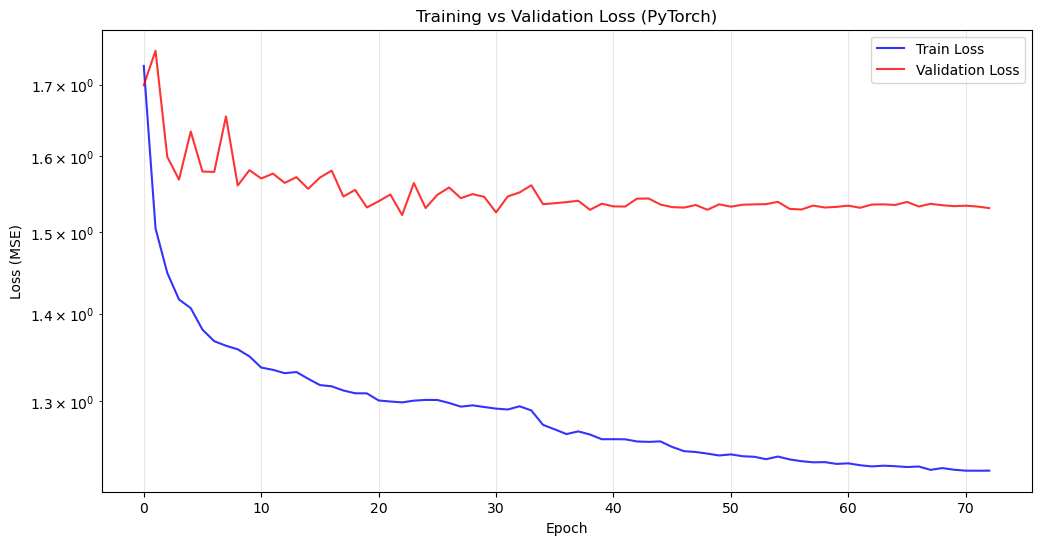


🔮 Generando predicciones finales...


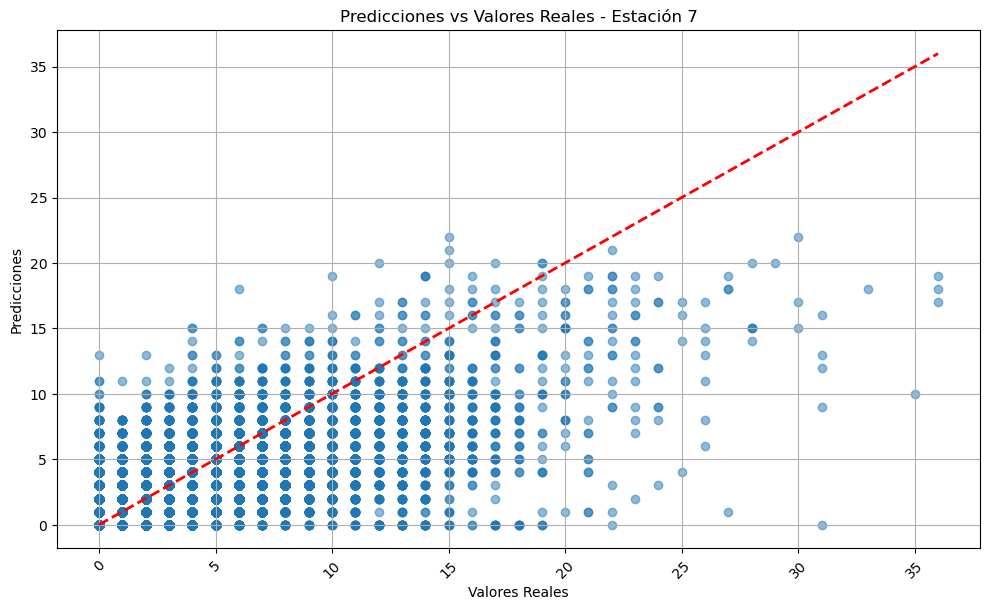

La media de los valores reales es: 1.0303385504836935
La media de las predicciones es: 0.9409153635465726

📊 Métricas finales PyTorch:
   MAE: 0.6939
   R²: 0.2958
   Val Loss final: 1.531282


In [ ]:
#Hago una red neuronal con pytorch
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Preparar datos
print("🔧 Preparando datos para PyTorch...")

# Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean_fixed)
X_val_scaled = scaler.transform(X_val_clean_fixed)

# Convertir a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_array_fixed)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val_array_fixed)

print(f"📊 Shapes:")
print(f"   X_train: {X_train_tensor.shape}")
print(f"   y_train: {y_train_tensor.shape}")
print(f"   X_val: {X_val_tensor.shape}")
print(f"   y_val: {y_val_tensor.shape}")

# Crear DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Configurar modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🖥️ Usando dispositivo: {device}")

input_size = X_train_tensor.shape[1]
output_size = y_train_tensor.shape[1]

model = NeuralNetwork(input_size, output_size, dropout_rate=0.3).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

print(f"🧠 Modelo creado:")
print(f"   Input size: {input_size}")
print(f"   Output size: {output_size}")
print(f"   Parámetros: {sum(p.numel() for p in model.parameters()):,}")

# Entrenamiento
num_epochs = 200
train_losses = []
val_losses = []
best_val_loss = float('inf')

print("\n🚀 Iniciando entrenamiento...")
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    num_batches = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = model.loss_fn(outputs, batch_y)
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        train_loss += loss.item()
        num_batches += 1
    
    avg_train_loss = train_loss / num_batches
    
    # Validation
    model.eval()
    val_loss = 0.0
    num_val_batches = 0
    
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = model.loss_fn(outputs, batch_y)
            val_loss += loss.item()
            num_val_batches += 1
    
    avg_val_loss = val_loss / num_val_batches
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    
    # Learning rate scheduling
    scheduler.step(avg_val_loss)
    
    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        # Guardar mejor modelo
        torch.save(model.state_dict(), 'best_model.pth')
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        
    # Early stopping with 50 epochs patience
    if epochs_without_improvement >= 50:
        print(f"Early stopping triggered after {epoch+1} epochs. No improvement for 50 epochs.")
        break
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}, LR: {current_lr:.6f}")

print(f"\n✅ Entrenamiento completado!")
print(f"📈 Mejor val loss: {best_val_loss:.6f}")

# Graficar pérdidas
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss', color='blue', alpha=0.8)
plt.plot(val_losses, label='Validation Loss', color='red', alpha=0.8)
plt.title('Training vs Validation Loss (PyTorch)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

# Predicciones finales
print("\n🔮 Generando predicciones finales...")
model.eval()
with torch.no_grad():
    X_val_device = X_val_tensor.to(device)
    predictions_pytorch = model(X_val_device).cpu().numpy()
    #Hago que las predicciones sean numeros enteros rendondeando
    predictions_pytorch = np.round(predictions_pytorch).astype(int)

# Clipear predicciones negativas
predictions_pytorch = np.clip(predictions_pytorch, 0, None)

# Graficar predicciones vs reales
graficar_pred_vs_real(y_val_array_fixed, predictions_pytorch, 7)

# Estadísticas finales
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_val_array_fixed, predictions_pytorch)
r2 = r2_score(y_val_array_fixed, predictions_pytorch)

print(f"\n📊 Métricas finales PyTorch:")
print(f"   MAE: {mae:.4f}")
print(f"   R²: {r2:.4f}")
print(f"   Val Loss final: {val_losses[-1]:.6f}")


📊 Analizando métricas por estación con modelo PyTorch...
📊 Calculando métricas por estación...
Estación 2: MAE=0.856, R²=0.429, Salidas=15333
Estación 3: MAE=1.038, R²=0.539, Salidas=25203
Estación 4: MAE=1.200, R²=0.601, Salidas=27006
Estación 5: MAE=1.676, R²=0.596, Salidas=45446
Estación 6: MAE=1.022, R²=0.494, Salidas=15821

📈 Estadísticas generales:
   • MAE promedio: 0.694
   • R² promedio: 0.296
   • Rango salidas: 334 - 62239


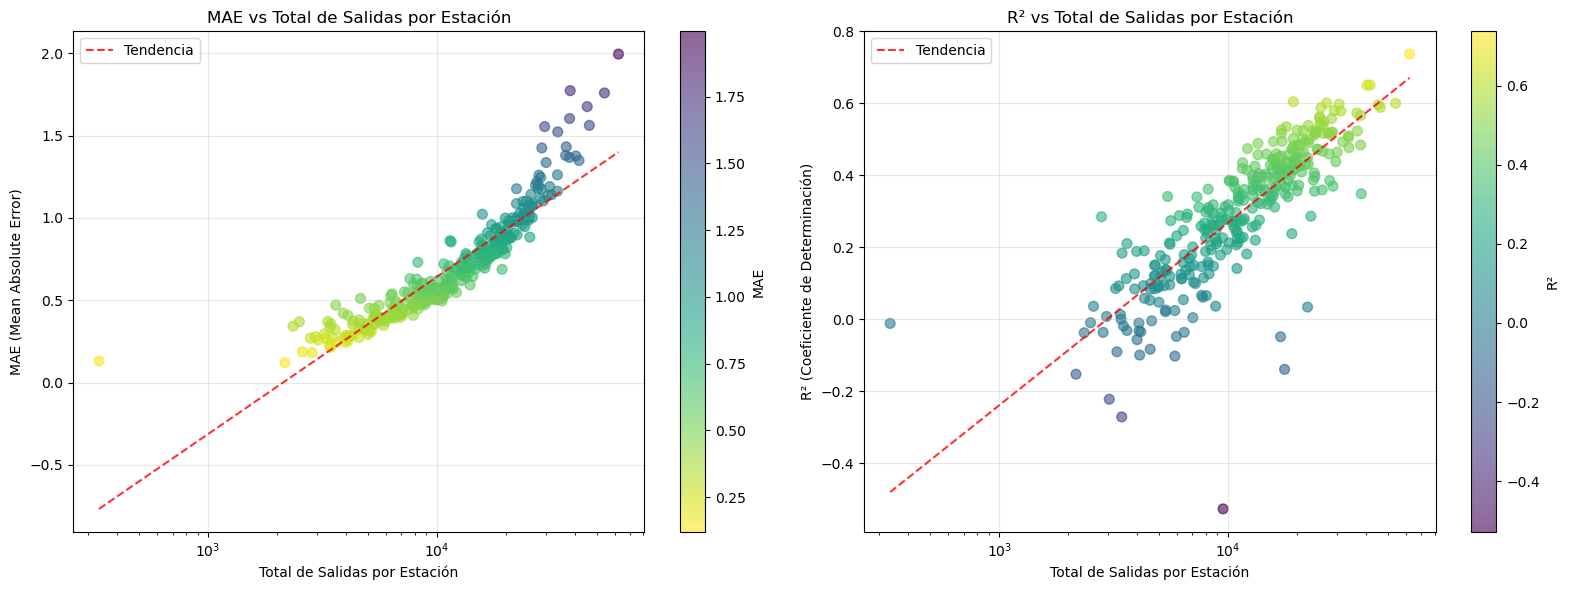


🔍 Análisis de correlación:
   • Correlación MAE vs log(Salidas): 0.916
   • Correlación R² vs log(Salidas): 0.825

🏆 TOP 5 ESTACIONES CON MENOR MAE:
   Estación 311: MAE=0.121, R²=-0.153, Salidas=2,168.0
   Estación 443: MAE=0.131, R²=-0.012, Salidas=334.0
   Estación 482: MAE=0.181, R²=-0.037, Salidas=2,848.0
   Estación 413: MAE=0.187, R²=0.036, Salidas=2,586.0
   Estación 471: MAE=0.214, R²=-0.272, Salidas=3,434.0

🥇 TOP 5 ESTACIONES CON MAYOR R²:
   Estación 175: R²=0.737, MAE=1.995, Salidas=62,239.0
   Estación 130: R²=0.651, MAE=1.376, Salidas=40,542.0
   Estación 202: R²=0.651, MAE=1.349, Salidas=41,844.0
   Estación  32: R²=0.605, MAE=0.688, Salidas=19,300.0
   Estación   4: R²=0.601, MAE=1.200, Salidas=27,006.0

⚠️ TOP 5 ESTACIONES CON MAYOR MAE:
   Estación 175: MAE=1.995, R²=0.737, Salidas=62,239.0
   Estación 152: MAE=1.773, R²=0.349, Salidas=38,287.0
   Estación  14: MAE=1.759, R²=0.600, Salidas=54,067.0
   Estación   5: MAE=1.676, R²=0.596, Salidas=45,446.0
   Estación 1

In [ ]:
from graficos_stats import analizar_metricas_por_estacion, graficar_metricas_vs_salidas, mostrar_estaciones_extremas
#Genero graficos de MAE y R cuadtrado vs la estacion

# Ejecutar análisis con las predicciones de PyTorch
print("📊 Analizando métricas por estación con modelo PyTorch...")

# Calcular métricas
metricas_df = analizar_metricas_por_estacion(
    y_val_array_fixed, 
    predictions_pytorch, 
    target_columns_sorted_val,
    df_para_salidas
)

# Graficar
metricas_finales = graficar_metricas_vs_salidas(metricas_df)

# Mostrar estaciones extremas
mostrar_estaciones_extremas(metricas_df)

# Guardar resultados
metricas_df.to_csv('metricas_por_estacion_pytorch.csv', index=False)
print("\n💾 Métricas guardadas en 'metricas_por_estacion_pytorch.csv'")

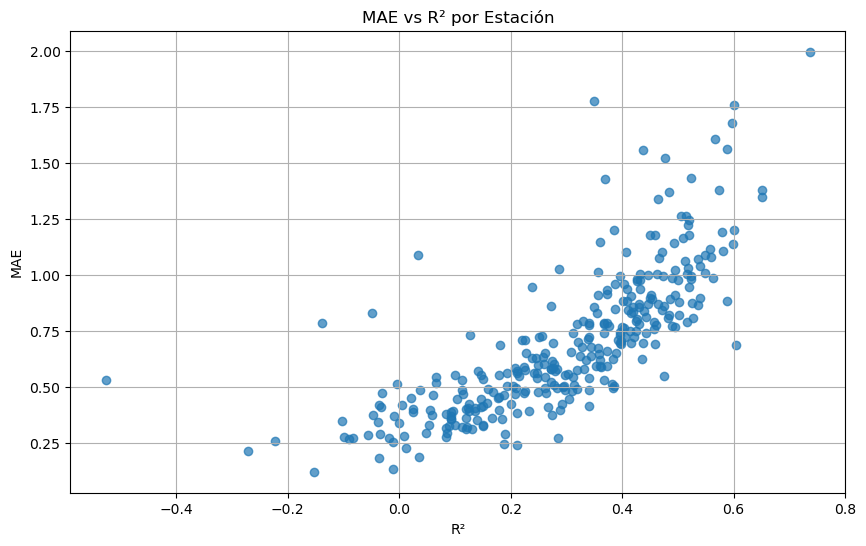

In [ ]:
#Grafico el MAE vs R cuadrado
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(metricas_df['r2'], metricas_df['mae'], alpha=0.7)
plt.title('MAE vs R² por Estación')
plt.xlabel('R²')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

🔢 Ajustando polinomio cuadrático a los puntos MAE vs R²...
📊 Datos para ajuste:
   • Puntos válidos: 317 de 317
   • Rango R²: -0.527 a 0.737
   • Rango MAE: 0.121 a 1.995

🔧 Método 1: numpy.polyfit
   Coeficientes: a=1.870376, b=0.405578, c=0.344839

🔧 Método 2: scipy.curve_fit
   Coeficientes: a=1.870376±0.199524, b=0.405578±0.109554, c=0.344839±0.019410
   Ecuación: MAE = 1.870376*R²² + 0.405578*R² + 0.344839


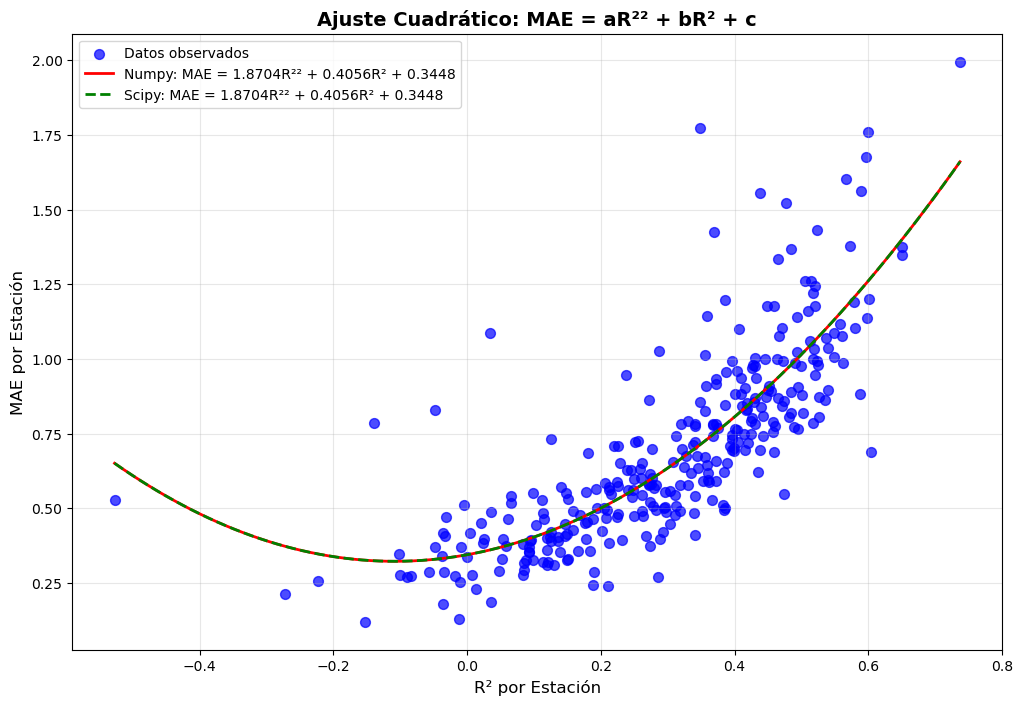

In [ ]:
#Ajusto una cuadratica
#Ajusto una cuadratica a los puntos MAE vs R²
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

print("🔢 Ajustando polinomio cuadrático a los puntos MAE vs R²...")

# Extraer datos del DataFrame
x_data = metricas_df['r2'].values  # R² como variable independiente
y_data = metricas_df['mae'].values  # MAE como variable dependiente

# Remover valores NaN o infinitos si los hay
mask = np.isfinite(x_data) & np.isfinite(y_data)
x_clean = x_data[mask]
y_clean = y_data[mask]

print(f"📊 Datos para ajuste:")
print(f"   • Puntos válidos: {len(x_clean)} de {len(x_data)}")
print(f"   • Rango R²: {x_clean.min():.3f} a {x_clean.max():.3f}")
print(f"   • Rango MAE: {y_clean.min():.3f} a {y_clean.max():.3f}")

# Definir función cuadrática
def cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

# Ajustar usando numpy.polyfit (método más simple)
print("\n🔧 Método 1: numpy.polyfit")
coeficientes_np = np.polyfit(x_clean, y_clean, 2)
a_np, b_np, c_np = coeficientes_np

print(f"   Coeficientes: a={a_np:.6f}, b={b_np:.6f}, c={c_np:.6f}")

# Ajustar usando scipy.optimize.curve_fit (con errores)
print("\n🔧 Método 2: scipy.curve_fit")
try:
    popt, pcov = curve_fit(cuadratica, x_clean, y_clean)
    a_scipy, b_scipy, c_scipy = popt
    
    # Calcular errores estándar
    errores = np.sqrt(np.diag(pcov))
    
    print(f"   Coeficientes: a={a_scipy:.6f}±{errores[0]:.6f}, b={b_scipy:.6f}±{errores[1]:.6f}, c={c_scipy:.6f}±{errores[2]:.6f}")
    print(f"   Ecuación: MAE = {a_scipy:.6f}*R²² + {b_scipy:.6f}*R² + {c_scipy:.6f}")
except Exception as e:
    print(f"   Error en curve_fit: {e}")
    a_scipy, b_scipy, c_scipy = a_np, b_np, c_np
    errores = [0, 0, 0]
# Generar puntos para la curva ajustada
x_curva = np.linspace(x_clean.min(), x_clean.max(), 100)
y_curva_np = np.polyval(coeficientes_np, x_curva)
y_curva_scipy = cuadratica(x_curva, a_scipy, b_scipy, c_scipy)

# Graficar
plt.figure(figsize=(12, 8))

# Scatter plot original
plt.scatter(x_clean, y_clean, alpha=0.7, color='blue', s=50, label='Datos observados')

# Curvas ajustadas
plt.plot(x_curva, y_curva_np, 'r-', linewidth=2, 
         label=f'Numpy: MAE = {a_np:.4f}R²² + {b_np:.4f}R² + {c_np:.4f}')
plt.plot(x_curva, y_curva_scipy, 'g--', linewidth=2, 
         label=f'Scipy: MAE = {a_scipy:.4f}R²² + {b_scipy:.4f}R² + {c_scipy:.4f}')

plt.xlabel('R² por Estación', fontsize=12)
plt.ylabel('MAE por Estación', fontsize=12)
plt.title('Ajuste Cuadrático: MAE = aR²² + bR² + c', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

In [ ]:
#Intento ahora hacer 'rebalanceo' de clases#Intento ahora hacer 'rebalanceo' de clases
#Intento ahora hacer 'rebalanceo' de clases
def rebalancear_muestras_target_alto(X, y, threshold=10, strategy='oversample', random_state=42):
    """
    Rebalancea las muestras basándose en si tienen valores target altos (> threshold)
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Features de entrada
    y : array-like, shape (n_samples, n_targets)
        Variables target (multitarget)
    threshold : float, default=5
        Umbral para considerar valores "altos"
    strategy : str, default='oversample'
        'oversample': Duplicar muestras con valores altos
        'undersample': Reducir muestras con valores bajos
        'smote': Generar muestras sintéticas (requiere imblearn)
        'weighted': Solo calcular pesos para el modelo
    random_state : int, default=42
        Semilla para reproducibilidad
    
    Returns:
    --------
    X_rebalanced, y_rebalanced : arrays rebalanceados
    weights : array de pesos por muestra (si strategy='weighted')
    info : dict con información del rebalanceo
    """
    import numpy as np
    import pandas as pd
    from collections import Counter
    
    # Convertir a numpy si es necesario
    X = np.array(X) if not isinstance(X, np.ndarray) else X
    y = np.array(y) if not isinstance(y, np.ndarray) else y
    
    print(f"🔄 Iniciando rebalanceo con threshold={threshold}, strategy='{strategy}'")
    print(f"📊 Dataset original: {X.shape[0]} muestras, {X.shape[1]} features, {y.shape[1]} targets")
    
    # Clasificar muestras según si tienen valores target altos
    # Una muestra es "alta" si tiene al menos UN target > threshold
    mask_high = (y > threshold).any(axis=1)
    
    # Contar muestras por clase
    n_high = mask_high.sum()
    n_low = (~mask_high).sum()
    
    print(f"📈 Distribución original:")
    print(f"   • Muestras con target alto (>{threshold}): {n_high} ({n_high/len(y)*100:.1f}%)")
    print(f"   • Muestras con target bajo (≤{threshold}): {n_low} ({n_low/len(y)*100:.1f}%)")
    print(f"   • Ratio alto/bajo: 1:{n_low/n_high:.1f}")
    
    if strategy == 'weighted':
        # Solo calcular pesos, no modificar dataset
        weights = np.ones(len(y))
        # Dar más peso a las muestras minoritarias
        if n_high < n_low:
            weight_high = n_low / n_high
            weights[mask_high] = weight_high
        else:
            weight_low = n_high / n_low
            weights[~mask_high] = weight_low
            
        print(f"⚖️ Pesos calculados:")
        print(f"   • Peso muestras altas: {weights[mask_high][0]:.2f}")
        print(f"   • Peso muestras bajas: {weights[~mask_high][0]:.2f}")
        
        return X, y, weights, {
            'original_high': n_high,
            'original_low': n_low,
            'strategy': strategy,
            'threshold': threshold
        }
    
    elif strategy == 'oversample':
        # Duplicar muestras de la clase minoritaria
        if n_high < n_low:
            # Duplicar muestras con target alto
            indices_high = np.where(mask_high)[0]
            indices_low = np.where(~mask_high)[0]
            
            # Calcular cuántas veces duplicar
            multiplier = int(np.ceil(n_low / n_high))
            
            # Crear índices replicados
            np.random.seed(random_state)
            indices_high_resampled = np.random.choice(
                indices_high, 
                size=n_low - n_high,  # Solo agregar la diferencia
                replace=True
            )
            
            # Combinar todos los índices
            all_indices = np.concatenate([
                indices_low,  # Todas las muestras bajas
                indices_high,  # Todas las muestras altas originales
                indices_high_resampled  # Muestras altas duplicadas
            ])
            
        else:
            # Duplicar muestras con target bajo
            indices_high = np.where(mask_high)[0]
            indices_low = np.where(~mask_high)[0]
            
            np.random.seed(random_state)
            indices_low_resampled = np.random.choice(
                indices_low,
                size=n_high - n_low,
                replace=True
            )
            
            all_indices = np.concatenate([
                indices_high,
                indices_low,
                indices_low_resampled
            ])
        
        # Reordenar aleatoriamente
        np.random.seed(random_state)
        np.random.shuffle(all_indices)
        
        X_rebalanced = X[all_indices]
        y_rebalanced = y[all_indices]
        
    elif strategy == 'undersample':
        # Reducir muestras de la clase mayoritaria
        if n_high < n_low:
            # Reducir muestras con target bajo
            indices_high = np.where(mask_high)[0]
            indices_low = np.where(~mask_high)[0]
            
            np.random.seed(random_state)
            indices_low_sampled = np.random.choice(
                indices_low,
                size=n_high,  # Igualar al número de muestras altas
                replace=False
            )
            
            all_indices = np.concatenate([indices_high, indices_low_sampled])
            
        else:
            # Reducir muestras con target alto
            indices_high = np.where(mask_high)[0]
            indices_low = np.where(~mask_high)[0]
            
            np.random.seed(random_state)
            indices_high_sampled = np.random.choice(
                indices_high,
                size=n_low,
                replace=False
            )
            
            all_indices = np.concatenate([indices_low, indices_high_sampled])
        
        # Reordenar aleatoriamente
        np.random.seed(random_state)
        np.random.shuffle(all_indices)
        
        X_rebalanced = X[all_indices]
        y_rebalanced = y[all_indices]
        
    
    else:
        raise ValueError(f"Strategy '{strategy}' no reconocida. Usa: 'oversample', 'undersample', 'smote', 'weighted'")
    
    # Verificar resultado
    if strategy != 'weighted':
        mask_high_new = (y_rebalanced > threshold).any(axis=1)
        n_high_new = mask_high_new.sum()
        n_low_new = (~mask_high_new).sum()
        
        print(f"✅ Distribución después del rebalanceo:")
        print(f"   • Dataset: {X_rebalanced.shape[0]} muestras")
        print(f"   • Muestras con target alto: {n_high_new} ({n_high_new/len(y_rebalanced)*100:.1f}%)")
        print(f"   • Muestras con target bajo: {n_low_new} ({n_low_new/len(y_rebalanced)*100:.1f}%)")
        print(f"   • Nuevo ratio alto/bajo: 1:{n_low_new/n_high_new:.1f}")
        
        return X_rebalanced, y_rebalanced, None, {
            'original_high': n_high,
            'original_low': n_low,
            'new_high': n_high_new,
            'new_low': n_low_new,
            'strategy': strategy,
            'threshold': threshold
        }

# Ejemplo de uso con diferentes estrategias
print("🎯 Aplicando rebalanceo al dataset de entrenamiento...")

# 1. Oversample (duplicar muestras con valores altos)
print("\n" + "="*50)
print("1️⃣ OVERSAMPLE")
X_train_over, y_train_over, _, info_over = rebalancear_muestras_target_alto(
    X_train_clean_fixed, 
    y_train_array_fixed, 
    threshold=10, 
    strategy='oversample'
)

# 2. Undersample (reducir muestras con valores bajos)
print("\n" + "="*50)
print("2️⃣ UNDERSAMPLE")
X_train_under, y_train_under, _, info_under = rebalancear_muestras_target_alto(
    X_train_clean_fixed, 
    y_train_array_fixed, 
    threshold=10, 
    strategy='undersample'
)

# 3. Weighted (solo calcular pesos)
print("\n" + "="*50)
print("3️⃣ WEIGHTED")
X_train_weighted, y_train_weighted, sample_weights, info_weighted = rebalancear_muestras_target_alto(
    X_train_clean_fixed, 
    y_train_array_fixed, 
    threshold=10, 
    strategy='weighted'
)

# Entrenar modelo con datos rebalanceados (oversample)
print("\n🚀 Entrenando modelo con datos OVERSAMPLED...")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model_rebalanced = LinearRegression()
model_rebalanced.fit(X_train_over, y_train_over)

# Predecir en validation (sin modificar)
predictions_rebalanced = model_rebalanced.predict(X_val_clean_fixed)
predictions_rebalanced = np.clip(predictions_rebalanced, 0, None)

# Métricas
mae_rebalanced = mean_absolute_error(y_val_array_fixed, predictions_rebalanced)
r2_rebalanced = r2_score(y_val_array_fixed, predictions_rebalanced)

print(f"📊 Métricas modelo rebalanceado:")
print(f"   MAE: {mae_rebalanced:.4f}")
print(f"   R²: {r2_rebalanced:.4f}")

# Comparar con modelo original
predictions_original = predictions_pytorch
predictions_original = np.clip(predictions_original, 0, None)
mae_original = mean_absolute_error(y_val_array_fixed, predictions_original)
r2_original = r2_score(y_val_array_fixed, predictions_original)

print(f"\n📊 Comparación:")
print(f"   Modelo original  - MAE: {mae_original:.4f}, R²: {r2_original:.4f}")
print(f"   Modelo rebalanceado - MAE: {mae_rebalanced:.4f}, R²: {r2_rebalanced:.4f}")
print(f"   Mejora MAE: {((mae_original - mae_rebalanced)/mae_original*100):+.2f}%")
print(f"   Mejora R²: {((r2_rebalanced - r2_original)/r2_original*100):+.2f}%")

# Analizar específicamente muestras con target alto
mask_val_high = (y_val_array_fixed > 10).any(axis=1)
if mask_val_high.sum() > 0:
    mae_high_original = mean_absolute_error(
        y_val_array_fixed[mask_val_high], 
        predictions_original[mask_val_high]
    )
    mae_high_rebalanced = mean_absolute_error(
        y_val_array_fixed[mask_val_high], 
        predictions_rebalanced[mask_val_high]
    )
    
    print(f"\n🎯 Rendimiento en muestras con target alto (>{5}):")
    print(f"   Modelo original: MAE = {mae_high_original:.4f}")
    print(f"   Modelo rebalanceado: MAE = {mae_high_rebalanced:.4f}")
    print(f"   Mejora: {((mae_high_original - mae_high_rebalanced)/mae_high_original*100):+.2f}%")


    # Entrenar modelo con datos rebalanceados (undersample)
    print("\n🚀 Entrenando modelo con datos UNDERSAMPLE...")
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, r2_score

    model_under = LinearRegression()
    model_under.fit(X_train_under, y_train_under)

    # Predecir en validation (sin modificar)
    predictions_under = model_under.predict(X_val_clean_fixed)
    predictions_under = np.clip(predictions_under, 0, None)

    # Métricas
    mae_under = mean_absolute_error(y_val_array_fixed, predictions_under)
    r2_under = r2_score(y_val_array_fixed, predictions_under)

    print(f"📊 Métricas modelo undersampled:")
    print(f"   MAE: {mae_under:.4f}")
    print(f"   R²: {r2_under:.4f}")

    # Entrenar modelo con pesos
    print("\n🚀 Entrenando modelo con WEIGHTED samples...")
    model_weighted = LinearRegression()
    model_weighted.fit(X_train_weighted, y_train_weighted, sample_weight=sample_weights)

    # Predecir en validation
    predictions_weighted = model_weighted.predict(X_val_clean_fixed)
    predictions_weighted = np.clip(predictions_weighted, 0, None)

    # Métricas
    mae_weighted = mean_absolute_error(y_val_array_fixed, predictions_weighted)
    r2_weighted = r2_score(y_val_array_fixed, predictions_weighted)

    print(f"📊 Métricas modelo weighted:")
    print(f"   MAE: {mae_weighted:.4f}")
    print(f"   R²: {r2_weighted:.4f}")

    # Comparar con modelo original
    predictions_original = predictions_pytorch
    predictions_original = np.clip(predictions_original, 0, None)
    mae_original = mean_absolute_error(y_val_array_fixed, predictions_original)
    r2_original = r2_score(y_val_array_fixed, predictions_original)

    print(f"\n📊 Comparación:")
    print(f"   Modelo original  - MAE: {mae_original:.4f}, R²: {r2_original:.4f}")
    print(f"   Modelo undersample - MAE: {mae_under:.4f}, R²: {r2_under:.4f}")
    print(f"   Modelo weighted - MAE: {mae_weighted:.4f}, R²: {r2_weighted:.4f}")
    print(f"   Mejora MAE undersample: {((mae_original - mae_under)/mae_original*100):+.2f}%")
    print(f"   Mejora R² undersample: {((r2_under - r2_original)/r2_original*100):+.2f}%")
    print(f"   Mejora MAE weighted: {((mae_original - mae_weighted)/mae_original*100):+.2f}%")
    print(f"   Mejora R² weighted: {((r2_weighted - r2_original)/r2_original*100):+.2f}%")

    # Analizar específicamente muestras con target alto
    mask_val_high = (y_val_array_fixed > 10).any(axis=1)
    if mask_val_high.sum() > 0:
        mae_high_original = mean_absolute_error(
            y_val_array_fixed[mask_val_high], 
            predictions_original[mask_val_high]
        )
        mae_high_under = mean_absolute_error(
            y_val_array_fixed[mask_val_high], 
            predictions_under[mask_val_high]
        )
        mae_high_weighted = mean_absolute_error(
            y_val_array_fixed[mask_val_high], 
            predictions_weighted[mask_val_high]
        )
        
        print(f"\n🎯 Rendimiento en muestras con target alto (>{10}):")
        print(f"   Modelo original: MAE = {mae_high_original:.4f}")
        print(f"   Modelo undersample: MAE = {mae_high_under:.4f}")
        print(f"   Modelo weighted: MAE = {mae_high_weighted:.4f}")
        print(f"   Mejora undersample: {((mae_high_original - mae_high_under)/mae_high_original*100):+.2f}%")
        print(f"   Mejora weighted: {((mae_high_original - mae_high_weighted)/mae_high_original*100):+.2f}%")

🎯 Aplicando rebalanceo al dataset de entrenamiento...

1️⃣ OVERSAMPLE
🔄 Iniciando rebalanceo con threshold=10, strategy='oversample'
📊 Dataset original: 11797 muestras, 366 features, 317 targets
📈 Distribución original:
   • Muestras con target alto (>10): 3527 (29.9%)
   • Muestras con target bajo (≤10): 8270 (70.1%)
   • Ratio alto/bajo: 1:2.3
✅ Distribución después del rebalanceo:
   • Dataset: 16540 muestras
   • Muestras con target alto: 8270 (50.0%)
   • Muestras con target bajo: 8270 (50.0%)
   • Nuevo ratio alto/bajo: 1:1.0

2️⃣ UNDERSAMPLE
🔄 Iniciando rebalanceo con threshold=10, strategy='undersample'
📊 Dataset original: 11797 muestras, 366 features, 317 targets
📈 Distribución original:
   • Muestras con target alto (>10): 3527 (29.9%)
   • Muestras con target bajo (≤10): 8270 (70.1%)
   • Ratio alto/bajo: 1:2.3
✅ Distribución después del rebalanceo:
   • Dataset: 7054 muestras
   • Muestras con target alto: 3527 (50.0%)
   • Muestras con target bajo: 3527 (50.0%)
   • Nuevo 

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


📊 Métricas modelo rebalanceado:
   MAE: 0.7967
   R²: 0.2825

📊 Comparación:
   Modelo original  - MAE: 0.6939, R²: 0.2958
   Modelo rebalanceado - MAE: 0.7967, R²: 0.2825
   Mejora MAE: -14.82%
   Mejora R²: -4.48%

🎯 Rendimiento en muestras con target alto (>5):
   Modelo original: MAE = 1.1970
   Modelo rebalanceado: MAE = 1.2772
   Mejora: -6.70%

🚀 Entrenando modelo con datos UNDERSAMPLE...


/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


📊 Métricas modelo undersampled:
   MAE: 0.7949
   R²: 0.2860

🚀 Entrenando modelo con WEIGHTED samples...
📊 Métricas modelo weighted:
   MAE: 0.7927
   R²: 0.2905

📊 Comparación:
   Modelo original  - MAE: 0.6939, R²: 0.2958
   Modelo undersample - MAE: 0.7949, R²: 0.2860
   Modelo weighted - MAE: 0.7927, R²: 0.2905
   Mejora MAE undersample: -14.56%
   Mejora R² undersample: -3.31%
   Mejora MAE weighted: -14.24%
   Mejora R² weighted: -1.79%

🎯 Rendimiento en muestras con target alto (>10):
   Modelo original: MAE = 1.1970
   Modelo undersample: MAE = 1.2749
   Modelo weighted: MAE = 1.2705
   Mejora undersample: -6.51%
   Mejora weighted: -6.14%


/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#Utilizo cross validation para encontrar los mejores hiperparametros 
# Utilizo cross validation para encontrar los mejores hiperparametros 
def optimizar_hiperparametros_nocturno(X_train, y_train, X_val, y_val, max_time_hours=8):
    """
    Función optimizada para encontrar mejores hiperparámetros en tiempo limitado
    
    Parameters:
    -----------
    X_train, y_train : datos de entrenamiento
    X_val, y_val : datos de validación  
    max_time_hours : tiempo máximo en horas (default 8h para una noche)
    
    Returns:
    --------
    resultados : dict con mejores modelos y métricas
    """
    import time
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import cross_val_score
    from sklearn.multioutput import MultiOutputRegressor
    from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
    from xgboost import XGBRegressor
    import torch
    import torch.nn as nn
    from torch.utils.data import DataLoader, TensorDataset
    from sklearn.preprocessing import StandardScaler
    
    start_time = time.time()
    max_seconds = max_time_hours * 3600
    
    print(f"🚀 Iniciando optimización nocturna (máximo {max_time_hours}h)")
    print(f"📊 Dataset: {X_train.shape[0]} muestras, {X_train.shape[1]} features, {y_train.shape[1]} targets")
    
    resultados = {
        'xgboost': {'mejor_modelo': None, 'mejor_score': float('inf'), 'mejor_params': None, 'tiempo': 0, 'rmse': float('inf')},
        'pytorch': {'mejor_modelo': None, 'mejor_score': float('inf'), 'mejor_params': None, 'tiempo': 0, 'rmse': float('inf')},
        'historial': []
    }
    
    # ===== PARTE 1: XGBoost (2-3 horas) =====
    print("\n" + "="*60)
    print("🌟 PARTE 1: OPTIMIZACIÓN XGBOOST")
    print("="*60)
    
    # Solo 3 configuraciones de XGBoost (rápidas)
    xgb_configs = [
        {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1},   # Rápido
        {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05}, # Balanceado  
        {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.03}  # Más complejo
    ]
    
    for i, params in enumerate(xgb_configs):
        if time.time() - start_time > max_seconds * 0.4:  # 40% del tiempo para XGBoost
            print(f"⏰ Tiempo agotado para XGBoost en configuración {i+1}")
            break
            
        print(f"\n🔧 Probando XGBoost {i+1}/3: {params}")
        config_start = time.time()
        
        try:
            # Modelo con menos verbosidad
            xgb_model = MultiOutputRegressor(
                XGBRegressor(
                    n_estimators=params['n_estimators'],
                    max_depth=params['max_depth'],
                    learning_rate=params['learning_rate'],
                    random_state=42,
                    n_jobs=-1,
                    verbosity=0  # Silencioso
                )
            )
            
            # Entrenar y evaluar rápidamente
            xgb_model.fit(X_train, y_train)
            pred_val = xgb_model.predict(X_val)
            pred_val = np.clip(pred_val, 0, None)
            
            mae = mean_absolute_error(y_val, pred_val)
            r2 = r2_score(y_val, pred_val)
            rmse = np.sqrt(mean_squared_error(y_val, pred_val))
            
            config_time = time.time() - config_start
            
            print(f"   ✅ MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, Tiempo: {config_time:.1f}s")
            
            # Guardar si es mejor
            if mae < resultados['xgboost']['mejor_score']:
                resultados['xgboost']['mejor_modelo'] = xgb_model
                resultados['xgboost']['mejor_score'] = mae
                resultados['xgboost']['rmse'] = rmse
                resultados['xgboost']['mejor_params'] = params
                resultados['xgboost']['tiempo'] = config_time
                print(f"   🏆 ¡Nuevo mejor XGBoost!")
            
            resultados['historial'].append({
                'modelo': 'XGBoost',
                'params': params,
                'mae': mae,
                'rmse': rmse,
                'r2': r2,
                'tiempo': config_time
            })
            
        except Exception as e:
            print(f"   ❌ Error en XGBoost {i+1}: {e}")
    
    # ===== PARTE 2: PyTorch Neural Networks (5-6 horas) =====
    print("\n" + "="*60)
    print("🧠 PARTE 2: OPTIMIZACIÓN PYTORCH")
    print("="*60)
    
    # Preparar datos para PyTorch
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.FloatTensor(y_val)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    input_size = X_train_tensor.shape[1]
    output_size = y_train_tensor.shape[1]
    
    # 3 arquitecturas simples pero efectivas
    arquitecturas = [
        {'layers': [400, 300, output_size], 'nombre': 'Pequeña'},      # Rápida
        {'layers': [500, 400, 300, output_size], 'nombre': 'Mediana'}, # Balanceada
        {'layers': [600, 500, 400, 300, output_size], 'nombre': 'Grande'} # Compleja
    ]
    
    # 3 valores de dropout
    dropout_values = [0.2, 0.3, 0.5]
    
    # Total: 3 arquitecturas × 3 dropouts = 9 configuraciones
    config_nn = 0
    total_nn_configs = len(arquitecturas) * len(dropout_values)
    
    for arch_idx, arch in enumerate(arquitecturas):
        for dropout in dropout_values:
            config_nn += 1
            
            if time.time() - start_time > max_seconds * 0.9:  # 90% del tiempo total
                print(f"⏰ Tiempo agotado para PyTorch en configuración {config_nn}")
                break
                
            print(f"\n🏗️ Probando Red {config_nn}/{total_nn_configs}: {arch['nombre']} + Dropout {dropout}")
            config_start = time.time()
            
            try:
                # Crear modelo dinámicamente
                class FlexibleNN(nn.Module):
                    def __init__(self, layers, dropout_rate):
                        super(FlexibleNN, self).__init__()
                        self.layers = nn.ModuleList()
                        self.dropouts = nn.ModuleList()
                        
                        # Crear capas dinámicamente
                        for i in range(len(layers) - 1):
                            self.layers.append(nn.Linear(layers[i], layers[i+1]))
                            if i < len(layers) - 2:  # No dropout en la última capa
                                self.dropouts.append(nn.Dropout(dropout_rate))
                        
                        self.loss_fn = nn.MSELoss()
                    
                    def forward(self, x):
                        for i, layer in enumerate(self.layers[:-1]):
                            x = torch.relu(layer(x))
                            x = self.dropouts[i](x)
                        x = self.layers[-1](x)  # Última capa sin activación
                        return x
                
                # Crear modelo
                layers = [input_size] + arch['layers']
                model = FlexibleNN(layers, dropout).to(device)
                optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
                
                # Entrenamiento rápido (menos épocas)
                epochs = 30  # Reducido para rapidez
                batch_size = 128  # Más grande para rapidez
                
                train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                
                model.train()
                for epoch in range(epochs):
                    for batch_X, batch_y in train_loader:
                        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                        
                        optimizer.zero_grad()
                        outputs = model(batch_X)
                        loss = model.loss_fn(outputs, batch_y)
                        loss.backward()
                        optimizer.step()
                
                # Evaluación
                model.eval()
                with torch.no_grad():
                    X_val_device = X_val_tensor.to(device)
                    pred_val = model(X_val_device).cpu().numpy()
                    pred_val = np.clip(pred_val, 0, None)
                
                mae = mean_absolute_error(y_val, pred_val)
                r2 = r2_score(y_val, pred_val)
                rmse = np.sqrt(mean_squared_error(y_val, pred_val))
                
                config_time = time.time() - config_start
                params_nn = {'arquitectura': arch['nombre'], 'layers': arch['layers'], 'dropout': dropout}
                
                print(f"   ✅ MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, Tiempo: {config_time:.1f}s")
                
                # Guardar si es mejor
                if mae < resultados['pytorch']['mejor_score']:
                    resultados['pytorch']['mejor_modelo'] = model
                    resultados['pytorch']['mejor_score'] = mae
                    resultados['pytorch']['rmse'] = rmse
                    resultados['pytorch']['mejor_params'] = params_nn
                    resultados['pytorch']['tiempo'] = config_time
                    print(f"   🏆 ¡Nueva mejor Red Neuronal!")
                
                resultados['historial'].append({
                    'modelo': 'PyTorch',
                    'params': params_nn,
                    'mae': mae,
                    'rmse': rmse,
                    'r2': r2,
                    'tiempo': config_time
                })
                
            except Exception as e:
                print(f"   ❌ Error en Red {config_nn}: {e}")
        
        if time.time() - start_time > max_seconds * 0.9:
            break
    
    # ===== RESUMEN FINAL =====
    total_time = time.time() - start_time
    print("\n" + "="*60)
    print("🏁 OPTIMIZACIÓN COMPLETADA")
    print("="*60)
    print(f"⏱️ Tiempo total: {total_time/3600:.2f} horas")
    
    # Mostrar mejores resultados
    print("\n🏆 MEJORES RESULTADOS:")
    
    if resultados['xgboost']['mejor_modelo'] is not None:
        print(f"\n🌟 Mejor XGBoost:")
        print(f"   MAE: {resultados['xgboost']['mejor_score']:.4f}")
        print(f"   RMSE: {resultados['xgboost']['rmse']:.4f}")
        print(f"   Parámetros: {resultados['xgboost']['mejor_params']}")
        print(f"   Tiempo: {resultados['xgboost']['tiempo']:.1f}s")
    
    if resultados['pytorch']['mejor_modelo'] is not None:
        print(f"\n🧠 Mejor PyTorch:")
        print(f"   MAE: {resultados['pytorch']['mejor_score']:.4f}")
        print(f"   RMSE: {resultados['pytorch']['rmse']:.4f}")
        print(f"   Parámetros: {resultados['pytorch']['mejor_params']}")
        print(f"   Tiempo: {resultados['pytorch']['tiempo']:.1f}s")
    
    # Determinar ganador absoluto
    mejor_global = 'xgboost' if resultados['xgboost']['mejor_score'] < resultados['pytorch']['mejor_score'] else 'pytorch'
    print(f"\n🥇 GANADOR GLOBAL: {mejor_global.upper()}")
    
    # Crear DataFrame con historial
    df_resultados = pd.DataFrame(resultados['historial'])
    if not df_resultados.empty:
        print("\n📊 Top 5 configuraciones:")
        top_5 = df_resultados.nsmallest(5, 'mae')[['modelo', 'mae', 'rmse', 'r2', 'tiempo']]
        print(top_5.to_string(index=False))
        
        # Guardar resultados
        df_resultados.to_csv('optimizacion_nocturna_resultados.csv', index=False)
        print("\n💾 Resultados guardados en 'optimizacion_nocturna_resultados.csv'")
    
    return resultados

# Ejecutar optimización
print("🌙 Iniciando optimización nocturna...")
resultados_finales = optimizar_hiperparametros_nocturno(
    X_train_clean_fixed, 
    y_train_array_fixed,
    X_val_clean_fixed, 
    y_val_array_fixed,
    max_time_hours=8  # 8 horas para una noche
)



🌙 Iniciando optimización nocturna...
🚀 Iniciando optimización nocturna (máximo 8h)
📊 Dataset: 11797 muestras, 366 features, 317 targets

🌟 PARTE 1: OPTIMIZACIÓN XGBOOST

🔧 Probando XGBoost 1/3: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}
   ✅ MAE: 0.7505, RMSE: 1.2713, R²: 0.3254, Tiempo: 73.7s
   🏆 ¡Nuevo mejor XGBoost!

🔧 Probando XGBoost 2/3: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05}
   ✅ MAE: 0.7459, RMSE: 1.2728, R²: 0.3227, Tiempo: 156.1s
   🏆 ¡Nuevo mejor XGBoost!

🔧 Probando XGBoost 3/3: {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.03}
   ✅ MAE: 0.7453, RMSE: 1.2796, R²: 0.3162, Tiempo: 374.8s
   🏆 ¡Nuevo mejor XGBoost!

🧠 PARTE 2: OPTIMIZACIÓN PYTORCH

🏗️ Probando Red 1/9: Pequeña + Dropout 0.2
   ✅ MAE: 0.7467, RMSE: 1.2910, R²: 0.3225, Tiempo: 20.9s
   🏆 ¡Nueva mejor Red Neuronal!

🏗️ Probando Red 2/9: Pequeña + Dropout 0.3
   ✅ MAE: 0.7493, RMSE: 1.2937, R²: 0.3219, Tiempo: 19.7s

🏗️ Probando Red 3/9: Pequeña + Dropout 0.5
   ✅ 

In [ ]:
ds_test_3 = pd.read_csv('../../data/processed/features3/test_dataset_features_3.csv')
#Encuentro x e y para val y test
(y_train_array_fixed, X_train_clean_fixed, 
 y_test_array_fixed, X_test_clean_fixed, target_columns_sorted_test) = equiparar_columnas(ds_train_3, ds_test_3)

class NeuralNetworkGrande(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate=0.3):
        super(NeuralNetworkGrande, self).__init__()
        
        # Arquitectura Grande: [600, 500, 400, 300, output_size]
        self.layers = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        
        # Definir las capas según la arquitectura exacta
        layer_sizes = [input_size, 600, 500, 400, 300, output_size]
        
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            # Agregar dropout solo en capas ocultas (no en la última)
            if i < len(layer_sizes) - 2:
                self.dropouts.append(nn.Dropout(dropout_rate))
        
        self.loss_fn = nn.MSELoss()
    
    def forward(self, x):
        # Pasar por todas las capas excepto la última
        for i, layer in enumerate(self.layers[:-1]):
            x = torch.relu(layer(x))  # ReLU en capas ocultas
            x = self.dropouts[i](x)   # Dropout después de ReLU
        
        # Última capa sin activación (regresión)
        x = self.layers[-1](x)
        return x

# Aplicar StandardScaler (preprocesamiento requerido)
print("📊 Aplicando StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean_fixed)
X_test_scaled = scaler.transform(X_test_clean_fixed)

# Convertir a tensores de PyTorch con datos escalados
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_array_fixed)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_array_fixed)

# Crear DataLoaders con batch_size específico
batch_size = 128  # Cambiado de 64 a 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Configurar modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🖥️ Usando dispositivo: {device}")

input_size = X_train_tensor.shape[1]
output_size = y_train_tensor.shape[1]


# Crear modelo con arquitectura específica
model = NeuralNetworkGrande(input_size, output_size, dropout_rate=0.3).to(device)

# Optimizador específico: Adam con lr=0.001 (sin weight_decay para mantener identidad)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Configuración de entrenamiento específica
num_epochs = 30  # Cambiado de 200 a 30
train_losses = []
test_losses = []

print(f"\n🚀 Iniciando entrenamiento por {num_epochs} épocas...")
print(f"📦 Batch size: {batch_size}")
print(f"📈 Learning rate: 0.001")

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    num_batches = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = model.loss_fn(outputs, batch_y)  # MSELoss específico
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        num_batches += 1
    
    avg_train_loss = train_loss / num_batches
    
    # Validation
    model.eval()
    test_loss = 0.0
    num_test_batches = 0
    
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = model.loss_fn(outputs, batch_y)
            test_loss += loss.item()
            num_test_batches += 1
    
    avg_test_loss = test_loss / num_test_batches
    
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    
    # Print progress cada 5 épocas (ya que son solo 30)
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Época [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.6f}, test Loss: {avg_test_loss:.6f}")

print(f"\n✅ Entrenamiento completado!")
print(f"📈 Test loss final: {test_losses[-1]:.6f}")

# Predicciones finales
print("\n Generando predicciones finales...")
model.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    predictions_pytorch = model(X_test_device).cpu().numpy()
    
    # Aplicar clipping específico: np.clip(pred, 0, None)
    predictions_pytorch = np.clip(predictions_pytorch, 0, None)
    
    # Hacer que las predicciones sean números enteros redondeando
    predictions_pytorch = np.round(predictions_pytorch).astype(int)

# Calcular métricas finales
mae = mean_absolute_error(y_test_array_fixed, predictions_pytorch)
r2 = r2_score(y_test_array_fixed, predictions_pytorch)
rmse = np.sqrt(mean_squared_error(y_test_array_fixed, predictions_pytorch))

print(f"\n🏆 Métricas finales modelo óptimo:")
print(f"   MAE: {mae:.4f}")
print(f"   R²: {r2:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   Test Loss final: {test_losses[-1]:.6f}")

🔄 Sincronizando columnas entre train y val...
📊 Features - Train: 382, Val: 377
🎯 Targets - Train: 324, Val: 363
❌ Features solo en train (serán eliminadas): 17
❌ Targets solo en train (serán eliminadas): 6
❌ Features faltantes en val: 17
❌ Targets faltantes en val: 6
   Primeras 5 features a eliminar de train: ['bicis_salieron_estacion_459', 'mes_5', 'mes_6', 'mes_7', 'mes_3']
   Primeras 5 targets a eliminar de train: ['target_estacion_459', 'target_estacion_151', 'target_estacion_205', 'target_estacion_95', 'target_estacion_31']
   ✅ Eliminada de train: mes_6
   ✅ Eliminada de train: mes_5
   ✅ Eliminada de train: mes_7
   ✅ Eliminada de train: mes_3
   ✅ Eliminada de train: mes_12
   ✅ Eliminada de train: mes_8
   ✅ Eliminada de train: target_estacion_151
   ✅ Eliminada de train: bicis_salieron_estacion_205
   ✅ Eliminada de train: mes_4
   ✅ Eliminada de train: bicis_salieron_estacion_95
   ✅ Eliminada de train: bicis_salieron_estacion_30
   ✅ Eliminada de train: bicis_salieron_es